# DMR using modkit 
(newly installed)

## ZFPoff high vs. unedited

In [187]:

import sys
# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

from funcs_dmr_modkit_analyze import current_time, load_pileup_bed, plot_pileup_df, load_dmr_and_parse, plot_dmr_summary

In [188]:
print("Current Date and Time:", current_time())

Current Date and Time: 2025-11-27 15:11:57


In [189]:
import os

os.environ["PATH"] = "/home/michalula/.cargo/bin:" + os.environ["PATH"]
! which modkit
! modkit --version

/home/michalula/.cargo/bin/modkit
modkit 0.5.1


# ZFP data - load Pile ups

In [190]:
date_today="20251118"

data_folder_path="/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/post_sort/ZFPoff_sortLOW/analyze_single_reads/dimelo_v2_output/"
pileup_data_folder_path=data_folder_path+"new_dmr_pileup/"

K562_Zoff_sortHIGH_mC07_Filter_bam="/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/post_sort/ZFPoff_sortHIGH/analyze_single_reads/dimelo_v2_output/filtered_reads_overlap_MORE_than_0.9_K562_ZFPoff_PostSort_HIGH_Day16_postEP_R9minion_threshold_mC0.7_T2Tv2_0_filterMode10_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60.bam"
pileup_K562_ZFPoff_sortHIGH_mC07_Filter_bed="/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/post_sort/ZFPoff_sortHIGH/analyze_single_reads/dimelo_v2_output/new_dmr_pileup/20251118_pileup_K562_ZoffHigh_Filter_mC07.bed"

K562_Zoff_sortHIGH_mC07_Filter_bam, pileup_K562_ZFPoff_sortHIGH_mC07_Filter_bed

('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/post_sort/ZFPoff_sortHIGH/analyze_single_reads/dimelo_v2_output/filtered_reads_overlap_MORE_than_0.9_K562_ZFPoff_PostSort_HIGH_Day16_postEP_R9minion_threshold_mC0.7_T2Tv2_0_filterMode10_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60.bam',
 '/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/post_sort/ZFPoff_sortHIGH/analyze_single_reads/dimelo_v2_output/new_dmr_pileup/20251118_pileup_K562_ZoffHigh_Filter_mC07.bed')

In [191]:
pileup_K562_Zoff_Filter_pileup_df = load_pileup_bed(pileup_K562_ZFPoff_sortHIGH_mC07_Filter_bed)
pileup_K562_Zoff_Filter_pileup_df

Reading bedMethyl file: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/post_sort/ZFPoff_sortHIGH/analyze_single_reads/dimelo_v2_output/new_dmr_pileup/20251118_pileup_K562_ZoffHigh_Filter_mC07.bed
Loaded DataFrame shape: (443, 18)


/home/michalula/code/epiCausality/epiCode/utils/funcs_dmr_modkit_analyze.py:83: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



,chrom,start,end,mod_code,score,strand,start2,end2,color,Nvalid_cov,percent_modified,Nmod,Ncanonical,Nother_mod,Ndelete,Nfail,Ndiff,Nnocall
0,chr1,206572114,206572115,m,1,-,206572114,206572115,"255,0,0",1,0.0,0,1,0,0,0,0,0
1,chr1,206572174,206572175,m,1,-,206572174,206572175,"255,0,0",1,0.0,0,1,0,0,0,0,0
2,chr1,206572712,206572713,m,1,-,206572712,206572713,"255,0,0",1,0.0,0,1,0,0,0,0,0
3,chr1,206572753,206572754,m,1,-,206572753,206572754,"255,0,0",1,100.0,1,0,0,0,0,0,0
4,chr1,206573039,206573040,m,1,-,206573039,206573040,"255,0,0",1,100.0,1,0,0,0,0,0,0


,chrom,start,end,mod_code,score,strand,start2,end2,color,Nvalid_cov,percent_modified,Nmod,Ncanonical,Nother_mod,Ndelete,Nfail,Ndiff,Nnocall
0,chr1,206572114,206572115,m,1,-,206572114,206572115,"255,0,0",1,0.0,0,1,0,0,0,0,0
1,chr1,206572174,206572175,m,1,-,206572174,206572175,"255,0,0",1,0.0,0,1,0,0,0,0,0
2,chr1,206572712,206572713,m,1,-,206572712,206572713,"255,0,0",1,0.0,0,1,0,0,0,0,0
3,chr1,206572753,206572754,m,1,-,206572753,206572754,"255,0,0",1,100.0,1,0,0,0,0,0,0
4,chr1,206573039,206573040,m,1,-,206573039,206573040,"255,0,0",1,100.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,chr1,206606725,206606726,m,1,+,206606725,206606726,"255,0,0",1,0.0,0,1,0,0,0,0,0
439,chr1,206607006,206607007,m,1,+,206607006,206607007,"255,0,0",1,100.0,1,0,0,0,0,0,0
440,chr1,206607206,206607207,m,1,+,206607206,206607207,"255,0,0",1,100.0,1,0,0,0,0,0,0
441,chr1,206607468,206607469,m,1,+,206607468,206607469,"255,0,0",1,100.0,1,0,0,0,0,0,0


In [192]:
pileup_K562_Zoff_Filter_pileup_df_stats = plot_pileup_df(df_roi=pileup_K562_Zoff_Filter_pileup_df, 
                                                out_dir=pileup_data_folder_path)
pileup_K562_Zoff_Filter_pileup_df_stats


# Rows: 443
Percent modified: median=77.11, mean=68.05
Coverage (Nvalid_cov): min=1, median=513.0, max=743


chrom,start,end,mod_code,score,strand,start2,end2,color,Nvalid_cov,percent_modified,Nmod,Ncanonical,Nother_mod,Ndelete,Nfail,Ndiff,Nnocall,pos
chr1,206572114,206572115,m,1,-,206572114,206572115,"255,0,0",1,0.0,0,1,0,0,0,0,0,206572114
chr1,206572174,206572175,m,1,-,206572174,206572175,"255,0,0",1,0.0,0,1,0,0,0,0,0,206572174
chr1,206572712,206572713,m,1,-,206572712,206572713,"255,0,0",1,0.0,0,1,0,0,0,0,0,206572712
chr1,206572753,206572754,m,1,-,206572753,206572754,"255,0,0",1,100.0,1,0,0,0,0,0,0,206572753
chr1,206573039,206573040,m,1,-,206573039,206573040,"255,0,0",1,100.0,1,0,0,0,0,0,0,206573039
chr1,206573044,206573045,m,1,-,206573044,206573045,"255,0,0",1,100.0,1,0,0,0,0,0,0,206573044
chr1,206573069,206573070,m,1,-,206573069,206573070,"255,0,0",1,100.0,1,0,0,0,0,0,0,206573069
chr1,206573129,206573130,m,1,-,206573129,206573130,"255,0,0",1,100.0,1,0,0,0,0,0,0,206573129
chr1,206573133,206573134,m,1,-,206573133,206573134,"255,0,0",1,100.0,1,0,0,0,0,0,0,206573133
chr1,206573135,206573136,m,1,-,206573135,206573136,"255,0,0",1,100.0,1,0,0,0,0,0,0,206573135


# rows: 443
Percent modified: median=77.11, mean=68.05
Coverage (Nvalid_cov): min=1, median=513.0, max=743


chrom,start,end,mod_code,score,strand,start2,end2,color,Nvalid_cov,percent_modified,Nmod,Ncanonical,Nother_mod,Ndelete,Nfail,Ndiff,Nnocall,pos
chr1,206572114,206572115,m,1,-,206572114,206572115,"255,0,0",1,0.0,0,1,0,0,0,0,0,206572114
chr1,206572174,206572175,m,1,-,206572174,206572175,"255,0,0",1,0.0,0,1,0,0,0,0,0,206572174
chr1,206572712,206572713,m,1,-,206572712,206572713,"255,0,0",1,0.0,0,1,0,0,0,0,0,206572712
chr1,206572753,206572754,m,1,-,206572753,206572754,"255,0,0",1,100.0,1,0,0,0,0,0,0,206572753
chr1,206573039,206573040,m,1,-,206573039,206573040,"255,0,0",1,100.0,1,0,0,0,0,0,0,206573039
chr1,206573044,206573045,m,1,-,206573044,206573045,"255,0,0",1,100.0,1,0,0,0,0,0,0,206573044
chr1,206573069,206573070,m,1,-,206573069,206573070,"255,0,0",1,100.0,1,0,0,0,0,0,0,206573069
chr1,206573129,206573130,m,1,-,206573129,206573130,"255,0,0",1,100.0,1,0,0,0,0,0,0,206573129
chr1,206573133,206573134,m,1,-,206573133,206573134,"255,0,0",1,100.0,1,0,0,0,0,0,0,206573133
chr1,206573135,206573136,m,1,-,206573135,206573136,"255,0,0",1,100.0,1,0,0,0,0,0,0,206573135


,chrom,start,end,mod_code,score,strand,start2,end2,color,Nvalid_cov,...,Nother_mod,Ndelete,Nfail,Ndiff,Nnocall,pos,label,Ntotal,Nmod_perc,Ncanonical_perc
0,chr1,206572114,206572115,m,1,-,206572114,206572115,"255,0,0",1,...,0,0,0,0,0,206572114,206572114:-,1,0.0,100.0
1,chr1,206572174,206572175,m,1,-,206572174,206572175,"255,0,0",1,...,0,0,0,0,0,206572174,206572174:-,1,0.0,100.0
2,chr1,206572712,206572713,m,1,-,206572712,206572713,"255,0,0",1,...,0,0,0,0,0,206572712,206572712:-,1,0.0,100.0
3,chr1,206572753,206572754,m,1,-,206572753,206572754,"255,0,0",1,...,0,0,0,0,0,206572753,206572753:-,1,100.0,0.0
4,chr1,206573039,206573040,m,1,-,206573039,206573040,"255,0,0",1,...,0,0,0,0,0,206573039,206573039:-,1,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,chr1,206606725,206606726,m,1,+,206606725,206606726,"255,0,0",1,...,0,0,0,0,0,206606725,206606725:+,1,0.0,100.0
439,chr1,206607006,206607007,m,1,+,206607006,206607007,"255,0,0",1,...,0,0,0,0,0,206607006,206607006:+,1,100.0,0.0
440,chr1,206607206,206607207,m,1,+,206607206,206607207,"255,0,0",1,...,0,0,0,0,0,206607206,206607206:+,1,100.0,0.0
441,chr1,206607468,206607469,m,1,+,206607468,206607469,"255,0,0",1,...,0,0,0,0,0,206607468,206607468:+,1,100.0,0.0


# ZFPoff unedited load Pile UP

In [193]:
date_today="20251118"

data_folder_path="/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/unedited/analyze_single_reads/dimelo_v2_output/"
pileup_data_folder_path=data_folder_path+"new_dmr_pileup/"
# mkdir ${pileup_data_folder_path}

K562_unedit_mC07_Filter_bam="/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/unedited/analyze_single_reads/dimelo_v2_output/filtered_reads_overlap_MORE_than_0.9_K562_unedited_Day2_postEP_R9minion_threshold_mC0.7_T2Tv2_0_filterMode10_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60.bam"
pileup_K562_unedit_mC07_Filter_bed="/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/unedited/analyze_single_reads/dimelo_v2_output/new_dmr_pileup/20251118_pileup_unedit_K562_Filter_mC07.bed"

K562_unedit_mC07_Filter_bam, pileup_K562_unedit_mC07_Filter_bed

('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/unedited/analyze_single_reads/dimelo_v2_output/filtered_reads_overlap_MORE_than_0.9_K562_unedited_Day2_postEP_R9minion_threshold_mC0.7_T2Tv2_0_filterMode10_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60.bam',
 '/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/unedited/analyze_single_reads/dimelo_v2_output/new_dmr_pileup/20251118_pileup_unedit_K562_Filter_mC07.bed')

In [194]:
pileup_K562_unedit_Filter_pileup_df = load_pileup_bed(pileup_K562_unedit_mC07_Filter_bed)
pileup_K562_unedit_Filter_pileup_df

Reading bedMethyl file: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/unedited/analyze_single_reads/dimelo_v2_output/new_dmr_pileup/20251118_pileup_unedit_K562_Filter_mC07.bed
Loaded DataFrame shape: (286, 18)


/home/michalula/code/epiCausality/epiCode/utils/funcs_dmr_modkit_analyze.py:83: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



,chrom,start,end,mod_code,score,strand,start2,end2,color,Nvalid_cov,percent_modified,Nmod,Ncanonical,Nother_mod,Ndelete,Nfail,Ndiff,Nnocall
0,chr1,206583089,206583090,m,6,+,206583089,206583090,"255,0,0",6,0.00,0,6,0,0,0,0,3
1,chr1,206583090,206583091,m,2,-,206583090,206583091,"255,0,0",2,0.00,0,2,0,1,0,0,0
2,chr1,206583173,206583174,m,88,+,206583173,206583174,"255,0,0",88,78.41,69,19,0,0,14,8,9
3,chr1,206583174,206583175,m,74,-,206583174,206583175,"255,0,0",74,89.19,66,8,0,2,2,0,6
4,chr1,206583387,206583388,m,92,+,206583387,206583388,"255,0,0",92,4.35,4,88,0,2,14,8,5


,chrom,start,end,mod_code,score,strand,start2,end2,color,Nvalid_cov,percent_modified,Nmod,Ncanonical,Nother_mod,Ndelete,Nfail,Ndiff,Nnocall
0,chr1,206583089,206583090,m,6,+,206583089,206583090,"255,0,0",6,0.00,0,6,0,0,0,0,3
1,chr1,206583090,206583091,m,2,-,206583090,206583091,"255,0,0",2,0.00,0,2,0,1,0,0,0
2,chr1,206583173,206583174,m,88,+,206583173,206583174,"255,0,0",88,78.41,69,19,0,0,14,8,9
3,chr1,206583174,206583175,m,74,-,206583174,206583175,"255,0,0",74,89.19,66,8,0,2,2,0,6
4,chr1,206583387,206583388,m,92,+,206583387,206583388,"255,0,0",92,4.35,4,88,0,2,14,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,chr1,206589931,206589932,m,6,-,206589931,206589932,"255,0,0",6,83.33,5,1,0,0,1,1,0
282,chr1,206589955,206589956,m,17,+,206589955,206589956,"255,0,0",17,88.24,15,2,0,0,1,1,1
283,chr1,206589956,206589957,m,6,-,206589956,206589957,"255,0,0",6,83.33,5,1,0,1,0,0,0
284,chr1,206590032,206590033,m,18,+,206590032,206590033,"255,0,0",18,94.44,17,1,0,0,0,1,1


In [195]:
pileup_K562_unedit_Filter_pileup_df_stats = plot_pileup_df(df_roi=pileup_K562_unedit_Filter_pileup_df, 
                                                out_dir=pileup_data_folder_path)
pileup_K562_unedit_Filter_pileup_df_stats


# Rows: 286
Percent modified: median=3.88, mean=19.56
Coverage (Nvalid_cov): min=2, median=80.5, max=118


chrom,start,end,mod_code,score,strand,start2,end2,color,Nvalid_cov,percent_modified,Nmod,Ncanonical,Nother_mod,Ndelete,Nfail,Ndiff,Nnocall,pos
chr1,206583089,206583090,m,6,+,206583089,206583090,"255,0,0",6,0.00,0,6,0,0,0,0,3,206583089
chr1,206583090,206583091,m,2,-,206583090,206583091,"255,0,0",2,0.00,0,2,0,1,0,0,0,206583090
chr1,206583173,206583174,m,88,+,206583173,206583174,"255,0,0",88,78.41,69,19,0,0,14,8,9,206583173
chr1,206583174,206583175,m,74,-,206583174,206583175,"255,0,0",74,89.19,66,8,0,2,2,0,6,206583174
chr1,206583387,206583388,m,92,+,206583387,206583388,"255,0,0",92,4.35,4,88,0,2,14,8,5,206583387
chr1,206583388,206583389,m,47,-,206583388,206583389,"255,0,0",47,17.02,8,39,0,5,3,1,29,206583388
chr1,206583707,206583708,m,96,+,206583707,206583708,"255,0,0",96,12.50,12,84,0,6,4,2,13,206583707
chr1,206583708,206583709,m,66,-,206583708,206583709,"255,0,0",66,7.58,5,61,0,1,2,8,8,206583708
chr1,206583766,206583767,m,84,+,206583766,206583767,"255,0,0",84,17.86,15,69,0,3,1,6,27,206583766
chr1,206583767,206583768,m,72,-,206583767,206583768,"255,0,0",72,31.94,23,49,0,0,7,2,4,206583767


# rows: 286
Percent modified: median=3.88, mean=19.56
Coverage (Nvalid_cov): min=2, median=80.5, max=118


chrom,start,end,mod_code,score,strand,start2,end2,color,Nvalid_cov,percent_modified,Nmod,Ncanonical,Nother_mod,Ndelete,Nfail,Ndiff,Nnocall,pos
chr1,206583089,206583090,m,6,+,206583089,206583090,"255,0,0",6,0.00,0,6,0,0,0,0,3,206583089
chr1,206583090,206583091,m,2,-,206583090,206583091,"255,0,0",2,0.00,0,2,0,1,0,0,0,206583090
chr1,206583173,206583174,m,88,+,206583173,206583174,"255,0,0",88,78.41,69,19,0,0,14,8,9,206583173
chr1,206583174,206583175,m,74,-,206583174,206583175,"255,0,0",74,89.19,66,8,0,2,2,0,6,206583174
chr1,206583387,206583388,m,92,+,206583387,206583388,"255,0,0",92,4.35,4,88,0,2,14,8,5,206583387
chr1,206583388,206583389,m,47,-,206583388,206583389,"255,0,0",47,17.02,8,39,0,5,3,1,29,206583388
chr1,206583707,206583708,m,96,+,206583707,206583708,"255,0,0",96,12.50,12,84,0,6,4,2,13,206583707
chr1,206583708,206583709,m,66,-,206583708,206583709,"255,0,0",66,7.58,5,61,0,1,2,8,8,206583708
chr1,206583766,206583767,m,84,+,206583766,206583767,"255,0,0",84,17.86,15,69,0,3,1,6,27,206583766
chr1,206583767,206583768,m,72,-,206583767,206583768,"255,0,0",72,31.94,23,49,0,0,7,2,4,206583767


,chrom,start,end,mod_code,score,strand,start2,end2,color,Nvalid_cov,...,Nother_mod,Ndelete,Nfail,Ndiff,Nnocall,pos,label,Ntotal,Nmod_perc,Ncanonical_perc
0,chr1,206583089,206583090,m,6,+,206583089,206583090,"255,0,0",6,...,0,0,0,0,3,206583089,206583089:+,6,0.000000,100.000000
1,chr1,206583090,206583091,m,2,-,206583090,206583091,"255,0,0",2,...,0,1,0,0,0,206583090,206583090:-,2,0.000000,100.000000
2,chr1,206583173,206583174,m,88,+,206583173,206583174,"255,0,0",88,...,0,0,14,8,9,206583173,206583173:+,88,78.409091,21.590909
3,chr1,206583174,206583175,m,74,-,206583174,206583175,"255,0,0",74,...,0,2,2,0,6,206583174,206583174:-,74,89.189189,10.810811
4,chr1,206583387,206583388,m,92,+,206583387,206583388,"255,0,0",92,...,0,2,14,8,5,206583387,206583387:+,92,4.347826,95.652174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,chr1,206589931,206589932,m,6,-,206589931,206589932,"255,0,0",6,...,0,0,1,1,0,206589931,206589931:-,6,83.333333,16.666667
282,chr1,206589955,206589956,m,17,+,206589955,206589956,"255,0,0",17,...,0,0,1,1,1,206589955,206589955:+,17,88.235294,11.764706
283,chr1,206589956,206589957,m,6,-,206589956,206589957,"255,0,0",6,...,0,1,0,0,0,206589956,206589956:-,6,83.333333,16.666667
284,chr1,206590032,206590033,m,18,+,206590032,206590033,"255,0,0",18,...,0,0,0,1,1,206590032,206590032:+,18,94.444444,5.555556


# dmr

In [88]:
%%bash
# 3. Detecting differential modification at single base positions
# The modkit dmr pair command has the ability to score individual bases (e.g. differentially methylated CpGs). To run single-base analysis on one or more paired samples, simply omit the --regions (-r) option when running modkit dmr pair. When performing single-base analysis the likelihood ratio score and a MAP-based p-value are available. For details on the likelihood ratio score and the MAP-based p-value, see the scoring details section. For example the above command becomes:

date_today="20251124"

experiment_codition="K562_ZFPoffHigh_vs_Unedit_filtered_mC07"
dmr_output_path="/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/"
dmr_result=${dmr_output_path}${date_today}"_single_base_"${experiment_codition}".bed"


pileup_K562_ZFPoff_sortHIGH_mC07_Filter_bed="/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/post_sort/ZFPoff_sortHIGH/analyze_single_reads/dimelo_v2_output/new_dmr_pileup/20251118_pileup_K562_ZoffHigh_Filter_mC07.bed"

cat "$pileup_K562_ZFPoff_sortHIGH_mC07_Filter_bed"
echo "pileup_K562_ZFPoff_sortHIGH_mC07_Filter_bed: ${pileup_K562_ZFPoff_sortHIGH_mC07_Filter_bed}.gz"
ls -l "${pileup_K562_ZFPoff_sortHIGH_mC07_Filter_bed}.gz"


pileup_K562_unedit_mC07_Filter_bed="/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/unedited/analyze_single_reads/dimelo_v2_output/new_dmr_pileup/20251118_pileup_unedit_K562_Filter_mC07.bed"

echo "pileup_K562_unedit_mC07_Filter_bed: ${pileup_K562_unedit_mC07_Filter_bed}.gz"
ls -l "${pileup_K562_unedit_mC07_Filter_bed}.gz"

ref_genome_fa="/home/michalula/data/ref_genomes/t2t_v2_0/chm13v2.0.fa"
# ref="/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
threads=32

cd ${dmr_output_path}
# '/home/michalula/code/epiCausality/epiCode/differential_methyl'
modkit dmr pair \
  -a ${pileup_K562_ZFPoff_sortHIGH_mC07_Filter_bed}.gz \
  -b ${pileup_K562_unedit_mC07_Filter_bed}.gz \
  -o ${dmr_result} \
  --ref ${ref_genome_fa} \
  --base C \
  --threads ${threads} \
  --log-filepath dmr.log


echo "dmr_result: $dmr_result"
ls -lah $dmr_result

chr1	206572114	206572115	m	1	-	206572114	206572115	255,0,0	1	0.00	0	1	0	0	0	0	0
chr1	206572174	206572175	m	1	-	206572174	206572175	255,0,0	1	0.00	0	1	0	0	0	0	0
chr1	206572712	206572713	m	1	-	206572712	206572713	255,0,0	1	0.00	0	1	0	0	0	0	0
chr1	206572753	206572754	m	1	-	206572753	206572754	255,0,0	1	100.00	1	0	0	0	0	0	0
chr1	206573039	206573040	m	1	-	206573039	206573040	255,0,0	1	100.00	1	0	0	0	0	0	0
chr1	206573044	206573045	m	1	-	206573044	206573045	255,0,0	1	100.00	1	0	0	0	0	0	0
chr1	206573069	206573070	m	1	-	206573069	206573070	255,0,0	1	100.00	1	0	0	0	0	0	0
chr1	206573129	206573130	m	1	-	206573129	206573130	255,0,0	1	100.00	1	0	0	0	0	0	0
chr1	206573133	206573134	m	1	-	206573133	206573134	255,0,0	1	100.00	1	0	0	0	0	0	0
chr1	206573135	206573136	m	1	-	206573135	206573136	255,0,0	1	100.00	1	0	0	0	0	0	0
chr1	206573141	206573142	m	1	-	206573141	206573142	255,0,0	1	100.00	1	0	0	0	0	0	0
chr1	206573145	206573146	m	1	-	206573145	206573146	255,0,0	1	100.00	1	0	0	0	0	0	0
chr1	206573189	2065731

> reading reference FASTA at "/home/michalula/data/ref_genomes/t2t_v2_0/chm13v2.0.fa"
> 1 common sequence(s) between FASTA and both samples
> running single-site analysis
> using default prior, Beta(α: 0.55, β: 0.55)
> estimating max coverages from data
> sampled 443 a records and 286 b records, calculating max coverages for 95th percentile
> calculated max coverage for a: 694 and b: 113
> calculated max coverage 694 is greater than maximum allowed (100), setting to 100
> calculated max coverage 113 is greater than maximum allowed (100), setting to 100
> errors:
+--------------------------+-------+
| error                    | count |
+--------------------------+-------+
| missing-in-one-condition | 110   |
+--------------------------+-------+

> finished, processed 286 sites successfully, 110 failed


dmr_result: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/20251124_single_base_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.bed
-rw-rw-r-- 1 michalula michalula 57K Nov 24 14:29 /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/20251124_single_base_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.bed


In [196]:
%%bash
date_today="20251124"

experiment_codition="K562_ZFPoffHigh_vs_Unedit_filtered_mC07" 
dmr_output_path="/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/"
# "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/modkit_dmr/mc_07_filtered/new_dmr_output/"
dmr_result=${dmr_output_path}${date_today}"_single_base_"${experiment_codition}".bed"

echo "dmr_result: $dmr_result"
ls -lah $dmr_output_path

dmr_result: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/20251124_single_base_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.bed
total 3.4M
drwxrwxr-x 2 michalula michalula 4.0K Nov 24 14:38 .
drwxrwxr-x 3 michalula michalula 4.0K Nov 24 13:11 ..
-rw-rw-r-- 1 michalula michalula 1.8K Nov 24 14:34 20251124_dmr_column_summary.csv
-rw-rw-r-- 1 michalula michalula  93K Nov 24 14:38 20251124_dmr_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.csv
-rw-rw-r-- 1 michalula michalula  50K Nov 24 14:34 20251124_dmr_parsed.csv
-rw-rw-r-- 1 michalula michalula 3.0M Nov 27 14:36 20251124_dmr_ZFP_filtered_mC07_modkit_new.ipynb
-rw-rw-r-- 1 michalula michalula  57K Nov 24 14:29 20251124_single_base_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.bed
-rw-rw-r-- 1 michalula michalula  19K Nov 24 14:35 dmr_effect_size_by_cgID_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.html
-rw-rw-r-- 1 michalula michalula  16K Nov 24 14:35 dmr_effect_size_by_cg_unit.html
-rw-rw-

In [197]:
# dmr_path="/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/modkit_dmr/mc_07_filtered/new_dmr_output/20251109_single_base_filtered_mC07_day6_CRoff_vs_Unedit.bed"

date_today="20251124"

experiment_codition="K562_ZFPoffHigh_vs_Unedit_filtered_mC07"
dmr_output_path="/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/"
dmr_path=dmr_output_path+date_today+"_single_base_"+experiment_codition+".bed"
dmr_path


'/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/20251124_single_base_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.bed'

In [198]:
dmr_df = load_dmr_and_parse(dmr_path, dmr_output_path, date_today)

dmr_df# .head()

out_dir: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/
Parquet not available, saved csv: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/20251124_dmr_parsed.csv
Loaded DMR: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/20251124_single_base_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.bed
Assigned columns: ['chrom', 'start', 'end', 'name', 'score', 'strand', 'samplea_counts', 'samplea_total', 'sampleb_counts', 'sampleb_total', 'samplea_percents', 'sampleb_percents', 'samplea_fraction_modified', 'sampleb_fraction_modified', 'map_pvalue', 'effect_size', 'cohen_h', 'cohen_h_low', 'cohen_h_high']
Shape: (286, 19)


,chrom,start,end,name,score,strand,samplea_counts,samplea_total,sampleb_counts,sampleb_total,samplea_percents,sampleb_percents,samplea_fraction_modified,sampleb_fraction_modified,map_pvalue,effect_size,cohen_h,cohen_h_low,cohen_h_high
0,chr1,206583089,206583090,.,-0.334175,+,m:0,11,m:0,6,m:0.00,m:0.00,0.000000,0.000000,1.000000,0.000000,0.000000,-0.994719,0.994719
1,chr1,206583090,206583091,.,-0.140460,-,m:1,11,m:0,2,m:9.09,m:0.00,0.090909,0.000000,1.000000,0.090909,0.612555,-0.894082,2.119191
2,chr1,206583173,206583174,.,2.267680,+,m:445,506,m:69,88,m:87.94,m:78.41,0.879447,0.784091,0.211393,0.095909,0.257317,0.030944,0.483690
3,chr1,206583174,206583175,.,-0.186045,-,m:540,592,m:66,74,m:91.22,m:89.19,0.912162,0.891892,1.000000,0.018108,0.068272,-0.173390,0.309934
4,chr1,206583387,206583388,.,0.170182,+,m:44,627,m:4,92,m:7.02,m:4.35,0.070175,0.043478,1.000000,0.026522,0.116102,-0.102717,0.334921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,chr1,206589931,206589932,.,-0.309418,-,m:22,27,m:5,6,m:81.48,m:83.33,0.814815,0.833333,1.000000,-0.018519,-0.048651,-0.835950,0.933252
282,chr1,206589955,206589956,.,-0.213918,+,m:36,39,m:15,17,m:92.31,m:88.24,0.923077,0.882353,1.000000,0.040724,0.138142,-0.431478,0.707762
283,chr1,206589956,206589957,.,-0.219006,-,m:18,20,m:5,6,m:90.00,m:83.33,0.900000,0.833333,1.000000,0.066667,0.197568,-0.714746,1.109881
284,chr1,206590032,206590033,.,3.092622,+,m:19,30,m:17,18,m:63.33,m:94.44,0.633333,0.944444,0.029517,-0.311111,-0.824981,0.240633,1.409330


In [199]:
plot_dmr_summary(dmr_df, dmr_output_path, date_today)

Saved summary: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/20251124_dmr_column_summary.csv
Plots saved to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/


In [200]:
import pandas as pd
import plotly.express as px
import numpy as np

In [201]:
# dmr_path="/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/modkit_dmr/mc_07_filtered/new_dmr_output/20251109_single_base_filtered_mC07_day6_CRoff_vs_Unedit.bed"

# date_today="20251110"

# experiment_codition="filtered_day6_CRoff_vs_Unedit"
# dmr_output_path="/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/modkit_dmr/mc_07/filtered/new_dmr_output/"
# dmr_result=dmr_output_path+date_today+"_single_base_noFiltered_mC07_"+experiment_codition+".bed"

# dmr_path=dmr_result
# dmr_path


In [202]:
dmr_path

'/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/20251124_single_base_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.bed'

In [203]:
out_dir = dmr_output_path
print("out_dir:", out_dir)

# Read DMR BED (robust to header/no-header) and assign canonical column names (uses existing vars: dmr_path, out_dir, date_today, pd, os)
canonical_cols = [
    "chrom", "start", "end", "name", "score", "strand",
    "samplea_counts", "samplea_total", "sampleb_counts", "sampleb_total",
    "samplea_percents", "sampleb_percents",
    "samplea_fraction_modified", "sampleb_fraction_modified",
    "map_pvalue", "effect_size",
    "cohen_h", "cohen_h_low", "cohen_h_high",
]
    # "balanced_map_pvalue", "balanced_effect_size"

# read file with header and fallback to header=None when headers look numeric or columns are unexpected
try:
    dmr_df = pd.read_csv(dmr_path, sep="\t", comment="#", header=None, engine="python")

    # dmr_df = pd.read_csv(dmr_path, sep="\t", comment="#", engine="python") # , header=0
    # # heuristic: if too many numeric-looking column names, re-read as headerless
    # numeric_headers = sum(1 for c in dmr_df.columns if str(c).strip().isdigit())
    # if numeric_headers >= (len(dmr_df.columns) / 2) or dmr_df.shape[1] < 3:
    #     dmr_df = pd.read_csv(dmr_path, sep="\t", comment="#", header=None, engine="python")
except Exception:
    dmr_df = pd.read_csv(dmr_path, sep="\t", comment="#", header=None, engine="python")

# assign canonical names up to number of columns present, add generic names for extras
ncols = dmr_df.shape[1]
if ncols <= len(canonical_cols):
    dmr_df.columns = canonical_cols[:ncols]
else:
    extras = [f"col_{i}" for i in range(ncols - len(canonical_cols))]
    dmr_df.columns = canonical_cols + extras

# coerce obvious numeric columns to numeric where present
num_cols_to_try = [
    "start", "end", "score",
    "samplea_total", "sampleb_total",
    "samplea_fraction_modified", "sampleb_fraction_modified",
    "map_pvalue", "effect_size",
    "balanced_map_pvalue", "balanced_effect_size"
]
for c in num_cols_to_try:
    if c in dmr_df.columns:
        dmr_df[c] = pd.to_numeric(dmr_df[c], errors="coerce")

# ensure output directory exists and save parsed table (parquet preferred)
os.makedirs(out_dir, exist_ok=True)
parsed_path = os.path.join(out_dir, f"{date_today}_dmr_parsed.parquet")
try:
    dmr_df.to_parquet(parsed_path, index=False)
    print("Saved parquet:", parsed_path)
except Exception:
    csv_path = os.path.join(out_dir, f"{date_today}_dmr_parsed.csv")
    dmr_df.to_csv(csv_path, index=False)
    print("Parquet not available, saved csv:", csv_path)

print("Loaded DMR:", dmr_path)
print("Assigned columns:", dmr_df.columns.tolist())
print("Shape:", dmr_df.shape)
dmr_df.head()

out_dir: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/
Parquet not available, saved csv: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/20251124_dmr_parsed.csv
Loaded DMR: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/20251124_single_base_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.bed
Assigned columns: ['chrom', 'start', 'end', 'name', 'score', 'strand', 'samplea_counts', 'samplea_total', 'sampleb_counts', 'sampleb_total', 'samplea_percents', 'sampleb_percents', 'samplea_fraction_modified', 'sampleb_fraction_modified', 'map_pvalue', 'effect_size', 'cohen_h', 'cohen_h_low', 'cohen_h_high']
Shape: (286, 19)


,chrom,start,end,name,score,strand,samplea_counts,samplea_total,sampleb_counts,sampleb_total,samplea_percents,sampleb_percents,samplea_fraction_modified,sampleb_fraction_modified,map_pvalue,effect_size,cohen_h,cohen_h_low,cohen_h_high
0,chr1,206583089,206583090,.,-0.334175,+,m:0,11,m:0,6,m:0.00,m:0.00,0.000000,0.000000,1.000000,0.000000,0.000000,-0.994719,0.994719
1,chr1,206583090,206583091,.,-0.140460,-,m:1,11,m:0,2,m:9.09,m:0.00,0.090909,0.000000,1.000000,0.090909,0.612555,-0.894082,2.119191
2,chr1,206583173,206583174,.,2.267680,+,m:445,506,m:69,88,m:87.94,m:78.41,0.879447,0.784091,0.211393,0.095909,0.257317,0.030944,0.483690
3,chr1,206583174,206583175,.,-0.186045,-,m:540,592,m:66,74,m:91.22,m:89.19,0.912162,0.891892,1.000000,0.018108,0.068272,-0.173390,0.309934
4,chr1,206583387,206583388,.,0.170182,+,m:44,627,m:4,92,m:7.02,m:4.35,0.070175,0.043478,1.000000,0.026522,0.116102,-0.102717,0.334921


In [204]:
import os
from IPython.display import display, HTML

# Visualize all columns from dmr_df and save interactive HTMLs to out_dir
import plotly.express as px
import plotly.graph_objects as go

os.makedirs(out_dir, exist_ok=True)

# Save a table summary
summary = dmr_df.describe(include='all').transpose()
summary_path = os.path.join(out_dir, f"{date_today}_dmr_column_summary.csv")
summary.to_csv(summary_path)

numcols = dmr_df.select_dtypes(include=['number']).columns.tolist()

def _safe_name(name):
    return str(name).replace(os.sep, "_").replace(" ", "_").replace("\t", "_")

# Per-column visualizations
for col in dmr_df.columns:
    safe = _safe_name(col)
    try:
        if col in numcols:
            # Histogram
            fig_h = px.histogram(dmr_df, x=col, nbins=80, title=f"Histogram: {col}")
            # fig_h.write_html(os.path.join(out_dir, f"{date_today}_dmr_hist_{safe}.html"), include_plotlyjs='cdn')
            fig_h.show()

            # Boxplot
            fig_b = px.box(dmr_df, y=col, points="outliers", title=f"Boxplot: {col}")
            # fig_b.write_html(os.path.join(out_dir, f"{date_today}_dmr_box_{safe}.html"), include_plotlyjs='cdn')
            fig_b.show()
        else:
            # Categorical / text: show top value counts (up to 50)
            vc = dmr_df[col].fillna("NA").astype(str).value_counts().head(50)
            if len(vc):
                fig_c = px.bar(x=vc.values[::-1], y=vc.index.astype(str)[::-1], orientation='h',
                               title=f"Top value counts: {col}", labels={'x':'count','y':col})
                fig_c.update_layout(yaxis={'categoryorder':'array','categoryarray':vc.index[::-1].astype(str).tolist()})
                # fig_c.write_html(os.path.join(out_dir, f"{date_today}_dmr_valcounts_{safe}.html"), include_plotlyjs='cdn')
                fig_c.show()
            else:
                # fallback: display empty info
                display(HTML(f"<b>{col}</b>: no values to plot"))
    except Exception as e:
        print(f"Skipped plotting column {col!r} due to error: {e}")

# Correlation heatmap for numeric columns
if len(numcols) >= 2:
    try:
        corr = dmr_df[numcols].corr()
        fig_corr = px.imshow(corr, text_auto=True, aspect="auto", title="Correlation matrix (numeric columns)")
        # fig_corr.write_html(os.path.join(out_dir, f"{date_today}_dmr_correlation_numeric.html"), include_plotlyjs='cdn')
        fig_corr.show()
    except Exception as e:
        print("Failed to create correlation heatmap:", e)

print("Saved summary:", summary_path)
print("Plots saved to:", out_dir)

Saved summary: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/20251124_dmr_column_summary.csv
Plots saved to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/


In [205]:
# Select significant CG pairs from DMR results and plot them (new cell at index 69).
# Uses existing notebook variables: dmr_df (parsed modkit dmr), df_roi_stats (pileup ROI stats),
# plotly (px) and out_dir/dmr_folder_path for saving. Does not re-import modules.

# Parameters
pvalue_thresh = 0.05

# ensure numeric columns
dmr_df['map_pvalue'] = pd.to_numeric(dmr_df['map_pvalue'], errors='coerce')
dmr_df['effect_size'] = pd.to_numeric(dmr_df['effect_size'], errors='coerce')
dmr_df['samplea_fraction_modified'] = pd.to_numeric(dmr_df['samplea_fraction_modified'], errors='coerce')
dmr_df['sampleb_fraction_modified'] = pd.to_numeric(dmr_df['sampleb_fraction_modified'], errors='coerce')

# filter significant by MAP-based p-value
sig = dmr_df[dmr_df['map_pvalue'] <= pvalue_thresh].copy()

dmr_df['map_pval_less005'] = dmr_df['map_pvalue'] <= 0.05


# # restrict to ROI positions if df_roi_stats exists
# if 'df_roi_stats' in globals():
#     roi_positions = set(df_roi_stats['start'].astype(int).tolist())
#     sig = sig[sig['start'].isin(roi_positions)].copy()

# quick exit if none
if sig.shape[0] == 0:
    print(f"No significant CG pairs found in ROI at map_pvalue <= {pvalue_thresh}")
else:
    # add convenience cols
    sig['pos'] = sig['start'].astype(str)
    sig['a_perc'] = sig['samplea_fraction_modified'] * 100
    sig['b_perc'] = sig['sampleb_fraction_modified'] * 100
    sig['total_reads'] = sig.get('samplea_total', 0).fillna(0).astype(int) + sig.get('sampleb_total', 0).fillna(0).astype(int)

    # save a table of significant sites
    os.makedirs(out_dir, exist_ok=True)
    sig_table_path = os.path.join(out_dir, f"dmr_significant_p{pvalue_thresh:.3f}_roi.tsv")
    sig.to_csv(sig_table_path, sep='\t', index=False)
    print("Saved significant sites table:", sig_table_path)
    display(sig[['chrom','start','end','strand','map_pvalue','effect_size','a_perc','b_perc','total_reads']].reset_index(drop=True))

    # plot the map_pval_less005 distribution which corresponds to significant sites
    fig_mappval_hist = px.histogram(
        dmr_df,
        x='map_pval_less005',
        nbins=80,
        title=f"MAP-based p-value distribution (highlighting p <= {pvalue_thresh}) <br>{experiment_codition}",
        labels={'map_pval_less005':'MAP-based p-value'}
    )
    fig_mappval_hist.update_layout(height=520)
    mappval_hist_path = os.path.join(out_dir, f"dmr_map_pval_distribution.html")
    # fig_mappval_hist.write_html(mappval_hist_path, include_plotlyjs='cdn')
    fig_mappval_hist.show()
    # print("Saved MAP-based p-value distribution histogram:", mappval_hist_path)

    # plot the percent of significant sites where map_pvalue <= pvalue_thresh is colored red, others blue (color not working)
    # Check https://plotly.com/python/pie-charts/ for coloring instructions
    percent_significant = (sig.shape[0] / dmr_df.shape[0]) * 100
    fig_mappval_pie = px.pie(
        dmr_df,
        names=['Not Significant (p > {})'.format(pvalue_thresh), 'Significant (p <= {})'.format(pvalue_thresh)],
        values=[dmr_df.shape[0] - sig.shape[0],sig.shape[0]],
        title=f"Percentage of significant CGs (map_pvalue <= {pvalue_thresh}): {percent_significant:.2f}% <br>{experiment_codition}",
        # color_discrete_map={'Not Significant (p > {})'.format(pvalue_thresh): 'blue',
        #                     'Significant (p <= {})'.format(pvalue_thresh): 'red'},
        # colors=['blue','red']
    )
    fig_mappval_pie.update_layout(height=520)
    mappval_pie_path = os.path.join(out_dir, f"dmr_map_pval_percentage.html")
    # fig_mappval_pie.write_html(mappval_pie_path, include_plotlyjs='cdn')
    fig_mappval_pie.show()
    # print("Saved MAP-based p-value percentage pie chart:", mappval_pie_path)


    # plot effect size distribution of all sites without sorting and highlight significant which have map_pvalue <= pvalue_thresh
    fig_effectsize_hist = px.histogram(
        dmr_df,
        x='effect_size',
        nbins=80,
        # add a line break and write experiment_codition into the title
        title=f"Effect size distribution (highlighting significant sites with map_pvalue <= {pvalue_thresh})<br>{experiment_codition}",
        color=(dmr_df['map_pvalue'] <= pvalue_thresh), 
        color_discrete_map={True: 'red', False: 'blue'},
    )
            # labels={'effect_size':'Effect size (A - B)'}

    fig_effectsize_hist.update_layout(height=520)
    effectsize_hist_path = os.path.join(out_dir, f"dmr_effect_size_distribution.html")
    # fig_effectsize_hist.write_html(effectsize_hist_path, include_plotlyjs='cdn')
    fig_effectsize_hist.show()
    # print("Saved effect size distribution histogram:", effectsize_hist_path)        

    # plot effect sizes of all sites without sorting and highlight significant which have map_pvalue <= pvalue_thresh 
    # add color legend names as 'Significant: map_pvalue <= pvalue_thresh' and 'Not Significant: map_pvalue > pvalue_thresh'  
    fig_effectsize_scatter = px.scatter(
        dmr_df,
        x=dmr_df.index,
        y='effect_size',
        color_discrete_map={True: 'red', False: 'blue'},
        color=(dmr_df['map_pvalue'] <= pvalue_thresh), 
        labels={'effect_size':'Effect size (A - B)','index':'Index',
                'color':f'Significant: map_pvalue <= {pvalue_thresh}'},
        title=f"Effect sizes for all CGs (highlighting significant sites with map_pvalue <= {pvalue_thresh}) <br>{experiment_codition}",
    )
    fig_effectsize_scatter.update_layout(height=520)
    effectsize_scatter_path = os.path.join(out_dir, f"dmr_effect_size_scatter.html")
    # fig_effectsize_scatter.write_html(effectsize_scatter_path, include_plotlyjs='cdn')
    fig_effectsize_scatter.show()
    # print("Saved effect size scatter plot:", effectsize_scatter_path)       

    # bar plot effect sizes of all sites without sorting and highlight significant which have map_pvalue <= pvalue_thresh 
    fig_effectsize_bar = px.bar(
        dmr_df,
        x=dmr_df.index,         
        y='effect_size',
        color=(dmr_df['map_pvalue'] <= pvalue_thresh),
        labels={'effect_size':'Effect size (A - B)','index':'Index',
                'color':f'Significant: map_pvalue <= {pvalue_thresh}'},
        color_discrete_map={True: 'red', False: 'blue'},
        title=f"Effect sizes for all CGs (n={len(dmr_df)}) (highlighting significant sites with map_pvalue <= {pvalue_thresh}) <br>{experiment_codition}",
    )
    fig_effectsize_bar.update_layout(height=520)
    effectsize_bar_path = os.path.join(out_dir, f"dmr_effect_size_bar.html")
    # fig_effectsize_bar.write_html(effectsize_bar_path, include_plotlyjs='cdn')
    fig_effectsize_bar.show()
    # print("Saved effect size bar plot:", effectsize_bar_path) 


    # Bar: effect size per position (without sorting) with effect size colors 
    # dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
    fig_bar_unsorted = px.bar(
        dmr_df,
        x=dmr_df.index, 
        y='effect_size',        
        color='effect_size',
        title=f"Effect size for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
        labels={'effect_size':'Effect size (A - B)','label':'position:strand'}
    )
            # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
            # x='label',

    fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
    bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
    # fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
    fig_bar_unsorted.show()
    # print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
        
    # Bar: effect size per position (without sorting)
    sig['label'] = sig['pos'] + ":" + sig['strand'].astype(str)
    fig_bar_unsorted = px.bar(
        sig,
        x='label',
        y='effect_size',        
        color='effect_size',
        hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        title=f"Effect size for significant CGs (n={len(sig)}) with map_pvalue <= {pvalue_thresh} <br>{experiment_codition}",
        labels={'effect_size':'Effect size (A - B)','label':'position:strand'}
    )
    fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
    bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
    # fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
    fig_bar_unsorted.show()
    # print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
        

    # Bar: effect size per position (sorted)
    sig_sorted = sig.sort_values('effect_size', ascending=False).copy()
    sig_sorted['label'] = sig_sorted['pos'] + ":" + sig_sorted['strand'].astype(str)
    fig_bar = px.bar(
        sig_sorted,
        x='label',
        y='effect_size',
        color='effect_size',
        hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        title=f"Effect size for significant CGs (n={len(sig_sorted)}) <br>{experiment_codition}",
        labels={'effect_size':'Effect size (A - B)','label':'position:strand'}
    )
    fig_bar.update_layout(xaxis_tickangle=45, height=520)
    bar_path = os.path.join(out_dir, f"dmr_sig_effectsize_p{pvalue_thresh:.3f}.html")
    # fig_bar.write_html(bar_path, include_plotlyjs='cdn')
    fig_bar.show()
    # print("Saved effect-size bar plot:", bar_path)



    # Scatter: sample A vs sample B percent modified (size = total reads, color = effect size)
    fig_scatter = px.scatter(
        sig,
        x='a_perc',
        y='b_perc',
        color='effect_size',
        size='total_reads',
        hover_data=['pos','start','map_pvalue','effect_size','cohen_h'],
        title=f"Significant CGs (map_pvalue <= {pvalue_thresh}) — sample A vs B percent modified <br>{experiment_codition}",
        labels={'a_perc':'Sample A % modified','b_perc':'Sample B % modified'}
    )
    fig_scatter.update_layout(height=520)
    scatter_path = os.path.join(out_dir, f"dmr_sig_scatter_p{pvalue_thresh:.3f}.html")
    # fig_scatter.write_html(scatter_path, include_plotlyjs='cdn')
    fig_scatter.show()
    # print("Saved scatter plot:", scatter_path)


Saved significant sites table: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/dmr_significant_p0.050_roi.tsv


,chrom,start,end,strand,map_pvalue,effect_size,a_perc,b_perc,total_reads
0,chr1,206585798,206585799,-,1.186017e-02,0.245000,62.180970,37.500000,487
1,chr1,206585896,206585897,+,5.466029e-03,0.220000,71.892655,50.467290,815
2,chr1,206585897,206585898,-,5.744636e-03,0.236667,73.170733,49.333334,690
3,chr1,206586121,206586122,-,9.158462e-03,0.130000,16.981132,4.000000,658
4,chr1,206586163,206586164,+,2.194100e-12,0.481111,57.167834,8.888889,662
...,...,...,...,...,...,...,...,...,...
215,chr1,206588089,206588090,-,2.700398e-02,0.102973,13.080895,2.702703,655
216,chr1,206588173,206588174,+,3.756000e-13,0.522500,70.588240,18.750000,725
217,chr1,206588174,206588175,-,0.000000e+00,0.605205,65.669010,5.479452,641
218,chr1,206588909,206588910,-,2.457181e-02,0.224035,61.215930,38.596490,534


In [206]:
import numpy as np

dmr_df['map_pval_log10'] = -np.log10(dmr_df['map_pvalue'] + 1e-10)  # add small constant to avoid log(0)
# dmr_df

# Bar: effect size per position (without sorting) with effect size colors 
# dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
fig_bar_unsorted = px.bar(
    dmr_df,
    x=dmr_df.index, 
    y='effect_size',        
    color='map_pvalue',
    title=f"Effect size & p-vals for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'effect_size':'Effect size (A - B)','label':'position:strand'}
)
        # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        # x='label',

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
fig_bar_unsorted.show()
# print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
    

# Bar: effect size per position (without sorting) with effect size colors 
# dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
fig_bar_unsorted = px.bar(
    dmr_df,
    x=dmr_df.index, 
    y='effect_size',        
    color='map_pval_log10',
    title=f"Effect size & log(p-vals) for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'effect_size':'Effect size (A - B)','label':'position:strand'}
)
        # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        # x='label',

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
fig_bar_unsorted.show()
# print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
    

# Bar: effect size per position (without sorting) with effect size colors 
# dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
fig_bar_unsorted = px.bar(
    dmr_df,
    x=dmr_df.index, 
    y='effect_size',        
    color='map_pval_less005',
    title=f"Effect size & p-vals<0.005 for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'effect_size':'Effect size (A - B)','label':'position:strand'}
)
        # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        # x='label',

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
fig_bar_unsorted.show()
# print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
    

In [207]:

# Bar: effect size per position (without sorting) with effect size colors 
# dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
fig_bar_unsorted = px.bar(
    dmr_df,
    x=dmr_df.index, 
    y='score',        
    color='map_pval_less005',
    title=f"Effect size & p-vals<0.005 for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'score':'LMR','label':'position:strand'}
)
        # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        # x='label',

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
fig_bar_unsorted.show()
# print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
    

In [208]:
cg_units_pair = [[f'CG_{i}', f'CG_{i}'] for i in range(-1,142)]
cg_units_pair = np.concat(cg_units_pair)

dmr_df['cg_unit_pair'] = cg_units_pair
dmr_df

,chrom,start,end,name,score,strand,samplea_counts,samplea_total,sampleb_counts,sampleb_total,...,samplea_fraction_modified,sampleb_fraction_modified,map_pvalue,effect_size,cohen_h,cohen_h_low,cohen_h_high,map_pval_less005,map_pval_log10,cg_unit_pair
0,chr1,206583089,206583090,.,-0.334175,+,m:0,11,m:0,6,...,0.000000,0.000000,1.000000,0.000000,0.000000,-0.994719,0.994719,False,-4.342945e-11,CG_-1
1,chr1,206583090,206583091,.,-0.140460,-,m:1,11,m:0,2,...,0.090909,0.000000,1.000000,0.090909,0.612555,-0.894082,2.119191,False,-4.342945e-11,CG_-1
2,chr1,206583173,206583174,.,2.267680,+,m:445,506,m:69,88,...,0.879447,0.784091,0.211393,0.095909,0.257317,0.030944,0.483690,False,6.749104e-01,CG_0
3,chr1,206583174,206583175,.,-0.186045,-,m:540,592,m:66,74,...,0.912162,0.891892,1.000000,0.018108,0.068272,-0.173390,0.309934,False,-4.342945e-11,CG_0
4,chr1,206583387,206583388,.,0.170182,+,m:44,627,m:4,92,...,0.070175,0.043478,1.000000,0.026522,0.116102,-0.102717,0.334921,False,-4.342945e-11,CG_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,chr1,206589931,206589932,.,-0.309418,-,m:22,27,m:5,6,...,0.814815,0.833333,1.000000,-0.018519,-0.048651,-0.835950,0.933252,False,-4.342945e-11,CG_139
282,chr1,206589955,206589956,.,-0.213918,+,m:36,39,m:15,17,...,0.923077,0.882353,1.000000,0.040724,0.138142,-0.431478,0.707762,False,-4.342945e-11,CG_140
283,chr1,206589956,206589957,.,-0.219006,-,m:18,20,m:5,6,...,0.900000,0.833333,1.000000,0.066667,0.197568,-0.714746,1.109881,False,-4.342945e-11,CG_140
284,chr1,206590032,206590033,.,3.092622,+,m:19,30,m:17,18,...,0.633333,0.944444,0.029517,-0.311111,-0.824981,0.240633,1.409330,True,1.529932e+00,CG_141


In [209]:
cg_units_pair_id = [[f'CG_{i}.+', f'CG_{i}.-'] for i in range(-1,142)]
cg_units_pair_id = np.concat(cg_units_pair_id)
cg_units_pair_id

array(['CG_-1.+', 'CG_-1.-', 'CG_0.+', 'CG_0.-', 'CG_1.+', 'CG_1.-',
       'CG_2.+', 'CG_2.-', 'CG_3.+', 'CG_3.-', 'CG_4.+', 'CG_4.-',
       'CG_5.+', 'CG_5.-', 'CG_6.+', 'CG_6.-', 'CG_7.+', 'CG_7.-',
       'CG_8.+', 'CG_8.-', 'CG_9.+', 'CG_9.-', 'CG_10.+', 'CG_10.-',
       'CG_11.+', 'CG_11.-', 'CG_12.+', 'CG_12.-', 'CG_13.+', 'CG_13.-',
       'CG_14.+', 'CG_14.-', 'CG_15.+', 'CG_15.-', 'CG_16.+', 'CG_16.-',
       'CG_17.+', 'CG_17.-', 'CG_18.+', 'CG_18.-', 'CG_19.+', 'CG_19.-',
       'CG_20.+', 'CG_20.-', 'CG_21.+', 'CG_21.-', 'CG_22.+', 'CG_22.-',
       'CG_23.+', 'CG_23.-', 'CG_24.+', 'CG_24.-', 'CG_25.+', 'CG_25.-',
       'CG_26.+', 'CG_26.-', 'CG_27.+', 'CG_27.-', 'CG_28.+', 'CG_28.-',
       'CG_29.+', 'CG_29.-', 'CG_30.+', 'CG_30.-', 'CG_31.+', 'CG_31.-',
       'CG_32.+', 'CG_32.-', 'CG_33.+', 'CG_33.-', 'CG_34.+', 'CG_34.-',
       'CG_35.+', 'CG_35.-', 'CG_36.+', 'CG_36.-', 'CG_37.+', 'CG_37.-',
       'CG_38.+', 'CG_38.-', 'CG_39.+', 'CG_39.-', 'CG_40.+', 'CG_40.-'

In [210]:
dmr_df.shape, cg_units_pair_id.shape

((286, 22), (286,))

In [211]:
dmr_df['cg_unit_pair_id'] = cg_units_pair_id
dmr_df

,chrom,start,end,name,score,strand,samplea_counts,samplea_total,sampleb_counts,sampleb_total,...,sampleb_fraction_modified,map_pvalue,effect_size,cohen_h,cohen_h_low,cohen_h_high,map_pval_less005,map_pval_log10,cg_unit_pair,cg_unit_pair_id
0,chr1,206583089,206583090,.,-0.334175,+,m:0,11,m:0,6,...,0.000000,1.000000,0.000000,0.000000,-0.994719,0.994719,False,-4.342945e-11,CG_-1,CG_-1.+
1,chr1,206583090,206583091,.,-0.140460,-,m:1,11,m:0,2,...,0.000000,1.000000,0.090909,0.612555,-0.894082,2.119191,False,-4.342945e-11,CG_-1,CG_-1.-
2,chr1,206583173,206583174,.,2.267680,+,m:445,506,m:69,88,...,0.784091,0.211393,0.095909,0.257317,0.030944,0.483690,False,6.749104e-01,CG_0,CG_0.+
3,chr1,206583174,206583175,.,-0.186045,-,m:540,592,m:66,74,...,0.891892,1.000000,0.018108,0.068272,-0.173390,0.309934,False,-4.342945e-11,CG_0,CG_0.-
4,chr1,206583387,206583388,.,0.170182,+,m:44,627,m:4,92,...,0.043478,1.000000,0.026522,0.116102,-0.102717,0.334921,False,-4.342945e-11,CG_1,CG_1.+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,chr1,206589931,206589932,.,-0.309418,-,m:22,27,m:5,6,...,0.833333,1.000000,-0.018519,-0.048651,-0.835950,0.933252,False,-4.342945e-11,CG_139,CG_139.-
282,chr1,206589955,206589956,.,-0.213918,+,m:36,39,m:15,17,...,0.882353,1.000000,0.040724,0.138142,-0.431478,0.707762,False,-4.342945e-11,CG_140,CG_140.+
283,chr1,206589956,206589957,.,-0.219006,-,m:18,20,m:5,6,...,0.833333,1.000000,0.066667,0.197568,-0.714746,1.109881,False,-4.342945e-11,CG_140,CG_140.-
284,chr1,206590032,206590033,.,3.092622,+,m:19,30,m:17,18,...,0.944444,0.029517,-0.311111,-0.824981,0.240633,1.409330,True,1.529932e+00,CG_141,CG_141.+


In [212]:
dmr_df[['cg_unit_pair_id']]

,cg_unit_pair_id
0,CG_-1.+
1,CG_-1.-
2,CG_0.+
3,CG_0.-
4,CG_1.+
...,...
281,CG_139.-
282,CG_140.+
283,CG_140.-
284,CG_141.+


In [213]:
experiment_codition

'K562_ZFPoffHigh_vs_Unedit_filtered_mC07'

In [214]:

# Bar: effect size per position (without sorting) with effect size colors 
# dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
fig_bar_unsorted = px.bar(
    dmr_df,
    x=dmr_df.index, 
    y='effect_size',        
    color='map_pval_less005',
    title=f"Effect size & p-vals<0.005 for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'effect_size':'Effect size (A - B)','label':'position:strand'}
)
        # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        # x='label',

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
fig_bar_unsorted.show()
# print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
    
    
# Bar: effect size per position (without sorting) with effect size colors 
# dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
fig_bar_unsorted = px.bar(
    dmr_df,
    x=dmr_df.index, 
    y='score',        
    color='map_pval_less005',
    title=f"log marginal Likelihood(LML) score & p-vals<0.005 for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'score':'LML','label':'position:strand'}
)
        # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        # x='label',

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
fig_bar_unsorted.show()
# print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
    

In [215]:
# Overlap the two barplots: effect_size (primary y) and score/LMR (secondary y)
# Uses existing notebook variables: dmr_df, out_dir, pvalue_thresh, experiment_codition, go, os

# prepare x (use index so bars align with previous plots)
x = dmr_df.index

# color effect_size by significance boolean already present
effect_colors = dmr_df['map_pval_less005'].map({True: 'red', False: 'steelblue'}).tolist()

trace_effect = go.Bar(
    x=x,
    y=dmr_df['effect_size'],
    name='Effect size (A - B)',
    marker=dict(color=effect_colors),
    opacity=0.85,
    hovertemplate='Index=%{x}<br>Effect size=%{y:.3f}<br>p<=0.05=%{marker.color}<extra></extra>',
    yaxis='y1'
)

trace_score = go.Bar(
    x=x,
    y=dmr_df['score'],
    name='Score (LMR)',
    marker=dict(color='green'),
    opacity=0.6,
    hovertemplate='Index=%{x}<br>Score=%{y:.3f}<extra></extra>',
    yaxis='y2'
)

fig = go.Figure(data=[trace_score, trace_effect])

fig.update_layout(
    title=f"Overlay: Effect size and Score (LMR) — {experiment_codition} (n={len(dmr_df)})",
    xaxis=dict(title='Index', tickangle=45),
    yaxis=dict(title='Effect size (A - B)', side='left', showgrid=True),
    yaxis2=dict(title='Score (LMR)', overlaying='y', side='right', showgrid=False),
    barmode='overlay',
    height=540,
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

# save and display
os.makedirs(out_dir, exist_ok=True)
# outpath = os.path.join(out_dir, f"dmr_overlay_effectsize_score_p{pvalue_thresh:.3f}.html")
# fig.write_html(outpath, include_plotlyjs='cdn')
# print("Saved overlay plot to:", outpath)
fig.show()

In [216]:
dmr_df['efsize-score'] = dmr_df['effect_size'] - dmr_df['score']
dmr_df

,chrom,start,end,name,score,strand,samplea_counts,samplea_total,sampleb_counts,sampleb_total,...,map_pvalue,effect_size,cohen_h,cohen_h_low,cohen_h_high,map_pval_less005,map_pval_log10,cg_unit_pair,cg_unit_pair_id,efsize-score
0,chr1,206583089,206583090,.,-0.334175,+,m:0,11,m:0,6,...,1.000000,0.000000,0.000000,-0.994719,0.994719,False,-4.342945e-11,CG_-1,CG_-1.+,0.334175
1,chr1,206583090,206583091,.,-0.140460,-,m:1,11,m:0,2,...,1.000000,0.090909,0.612555,-0.894082,2.119191,False,-4.342945e-11,CG_-1,CG_-1.-,0.231369
2,chr1,206583173,206583174,.,2.267680,+,m:445,506,m:69,88,...,0.211393,0.095909,0.257317,0.030944,0.483690,False,6.749104e-01,CG_0,CG_0.+,-2.171771
3,chr1,206583174,206583175,.,-0.186045,-,m:540,592,m:66,74,...,1.000000,0.018108,0.068272,-0.173390,0.309934,False,-4.342945e-11,CG_0,CG_0.-,0.204153
4,chr1,206583387,206583388,.,0.170182,+,m:44,627,m:4,92,...,1.000000,0.026522,0.116102,-0.102717,0.334921,False,-4.342945e-11,CG_1,CG_1.+,-0.143660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,chr1,206589931,206589932,.,-0.309418,-,m:22,27,m:5,6,...,1.000000,-0.018519,-0.048651,-0.835950,0.933252,False,-4.342945e-11,CG_139,CG_139.-,0.290900
282,chr1,206589955,206589956,.,-0.213918,+,m:36,39,m:15,17,...,1.000000,0.040724,0.138142,-0.431478,0.707762,False,-4.342945e-11,CG_140,CG_140.+,0.254642
283,chr1,206589956,206589957,.,-0.219006,-,m:18,20,m:5,6,...,1.000000,0.066667,0.197568,-0.714746,1.109881,False,-4.342945e-11,CG_140,CG_140.-,0.285673
284,chr1,206590032,206590033,.,3.092622,+,m:19,30,m:17,18,...,0.029517,-0.311111,-0.824981,0.240633,1.409330,True,1.529932e+00,CG_141,CG_141.+,-3.403733


In [217]:
dmr_df['score-efsize'] = dmr_df['score'] - dmr_df['effect_size']
dmr_df

,chrom,start,end,name,score,strand,samplea_counts,samplea_total,sampleb_counts,sampleb_total,...,effect_size,cohen_h,cohen_h_low,cohen_h_high,map_pval_less005,map_pval_log10,cg_unit_pair,cg_unit_pair_id,efsize-score,score-efsize
0,chr1,206583089,206583090,.,-0.334175,+,m:0,11,m:0,6,...,0.000000,0.000000,-0.994719,0.994719,False,-4.342945e-11,CG_-1,CG_-1.+,0.334175,-0.334175
1,chr1,206583090,206583091,.,-0.140460,-,m:1,11,m:0,2,...,0.090909,0.612555,-0.894082,2.119191,False,-4.342945e-11,CG_-1,CG_-1.-,0.231369,-0.231369
2,chr1,206583173,206583174,.,2.267680,+,m:445,506,m:69,88,...,0.095909,0.257317,0.030944,0.483690,False,6.749104e-01,CG_0,CG_0.+,-2.171771,2.171771
3,chr1,206583174,206583175,.,-0.186045,-,m:540,592,m:66,74,...,0.018108,0.068272,-0.173390,0.309934,False,-4.342945e-11,CG_0,CG_0.-,0.204153,-0.204153
4,chr1,206583387,206583388,.,0.170182,+,m:44,627,m:4,92,...,0.026522,0.116102,-0.102717,0.334921,False,-4.342945e-11,CG_1,CG_1.+,-0.143660,0.143660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,chr1,206589931,206589932,.,-0.309418,-,m:22,27,m:5,6,...,-0.018519,-0.048651,-0.835950,0.933252,False,-4.342945e-11,CG_139,CG_139.-,0.290900,-0.290900
282,chr1,206589955,206589956,.,-0.213918,+,m:36,39,m:15,17,...,0.040724,0.138142,-0.431478,0.707762,False,-4.342945e-11,CG_140,CG_140.+,0.254642,-0.254642
283,chr1,206589956,206589957,.,-0.219006,-,m:18,20,m:5,6,...,0.066667,0.197568,-0.714746,1.109881,False,-4.342945e-11,CG_140,CG_140.-,0.285673,-0.285673
284,chr1,206590032,206590033,.,3.092622,+,m:19,30,m:17,18,...,-0.311111,-0.824981,0.240633,1.409330,True,1.529932e+00,CG_141,CG_141.+,-3.403733,3.403733


In [218]:
# min-max scale 'score' to [0,1] and update overlay figure if present
s_min = dmr_df['score'].min(skipna=True)
s_max = dmr_df['score'].max(skipna=True)

if pd.isna(s_min) or pd.isna(s_max):
    dmr_df['score_scaled'] = pd.NA
else:
    if s_max == s_min:
        dmr_df['score_scaled'] = 0.0
    else:
        dmr_df['score_scaled'] = (dmr_df['score'] - s_min) / (s_max - s_min)

print(f"score min={s_min}, max={s_max} -> added column 'score_scaled' (0-1)")

# If overlay figure exists, update the score trace to use the scaled values and adjust right y-axis
if 'fig' in globals() and len(fig.data) > 0:
    try:
        # in this notebook fig.data[0] is the score trace
        fig.data[0].y = dmr_df['score_scaled'].astype(float).values
        fig.data[0].name = 'Score (LMR) (scaled 0-1)'
        # adjust right y-axis to [0,1]
        if 'yaxis2' in fig.layout:
            fig.layout.yaxis2.title.text = 'Score (LMR) (scaled 0-1)'
            fig.layout.yaxis2.range = [0, 1]
        else:
            fig.update_layout(yaxis2=dict(title='Score (LMR) (scaled 0-1)', overlaying='y', side='right', range=[0,1]))
        fig.show()
    except Exception as e:
        print("Failed to update fig with scaled scores:", e)

# show a quick check
display(dmr_df[['score','score_scaled']].head())

score min=-0.3426033493545901, max=190.82102999640523 -> added column 'score_scaled' (0-1)


,score,score_scaled
0,-0.334175,0.000044
1,-0.140460,0.001057
2,2.267680,0.013655
3,-0.186045,0.000819
4,0.170182,0.002682


In [219]:
dmr_df['efsize-score_scaled'] = dmr_df['effect_size'] - dmr_df['score_scaled'] 
dmr_df

,chrom,start,end,name,score,strand,samplea_counts,samplea_total,sampleb_counts,sampleb_total,...,cohen_h_low,cohen_h_high,map_pval_less005,map_pval_log10,cg_unit_pair,cg_unit_pair_id,efsize-score,score-efsize,score_scaled,efsize-score_scaled
0,chr1,206583089,206583090,.,-0.334175,+,m:0,11,m:0,6,...,-0.994719,0.994719,False,-4.342945e-11,CG_-1,CG_-1.+,0.334175,-0.334175,0.000044,-0.000044
1,chr1,206583090,206583091,.,-0.140460,-,m:1,11,m:0,2,...,-0.894082,2.119191,False,-4.342945e-11,CG_-1,CG_-1.-,0.231369,-0.231369,0.001057,0.089852
2,chr1,206583173,206583174,.,2.267680,+,m:445,506,m:69,88,...,0.030944,0.483690,False,6.749104e-01,CG_0,CG_0.+,-2.171771,2.171771,0.013655,0.082254
3,chr1,206583174,206583175,.,-0.186045,-,m:540,592,m:66,74,...,-0.173390,0.309934,False,-4.342945e-11,CG_0,CG_0.-,0.204153,-0.204153,0.000819,0.017289
4,chr1,206583387,206583388,.,0.170182,+,m:44,627,m:4,92,...,-0.102717,0.334921,False,-4.342945e-11,CG_1,CG_1.+,-0.143660,0.143660,0.002682,0.023839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,chr1,206589931,206589932,.,-0.309418,-,m:22,27,m:5,6,...,-0.835950,0.933252,False,-4.342945e-11,CG_139,CG_139.-,0.290900,-0.290900,0.000174,-0.018692
282,chr1,206589955,206589956,.,-0.213918,+,m:36,39,m:15,17,...,-0.431478,0.707762,False,-4.342945e-11,CG_140,CG_140.+,0.254642,-0.254642,0.000673,0.040051
283,chr1,206589956,206589957,.,-0.219006,-,m:18,20,m:5,6,...,-0.714746,1.109881,False,-4.342945e-11,CG_140,CG_140.-,0.285673,-0.285673,0.000647,0.066020
284,chr1,206590032,206590033,.,3.092622,+,m:19,30,m:17,18,...,0.240633,1.409330,True,1.529932e+00,CG_141,CG_141.+,-3.403733,3.403733,0.017970,-0.329081


In [220]:

# Bar: effect size per position (without sorting) with effect size colors 
# dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
fig_bar_unsorted = px.bar(
    dmr_df,
    x=dmr_df.index, 
    y='efsize-score_scaled',        
    color='map_pval_less005',
    title=f"sefsize-score_scaled (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'efsize-score_scaled':'Effect size (A - B)','label':'position:strand'}
)
        # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        # x='label',

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
fig_bar_unsorted.show()
# print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
    

In [221]:
dmr_df.columns

Index(['chrom', 'start', 'end', 'name', 'score', 'strand', 'samplea_counts',
       'samplea_total', 'sampleb_counts', 'sampleb_total', 'samplea_percents',
       'sampleb_percents', 'samplea_fraction_modified',
       'sampleb_fraction_modified', 'map_pvalue', 'effect_size', 'cohen_h',
       'cohen_h_low', 'cohen_h_high', 'map_pval_less005', 'map_pval_log10',
       'cg_unit_pair', 'cg_unit_pair_id', 'efsize-score', 'score-efsize',
       'score_scaled', 'efsize-score_scaled'],
      dtype='object')

In [222]:

# Bar: effect size per position (without sorting) with effect size colors 
# dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
fig_bar_unsorted = px.bar(
    dmr_df,
    x=dmr_df['start'], 
    y='effect_size',        
    color='map_pval_less005',
    title=f"sefsize-score_scaled (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'efsize-score_scaled':'Effect size (A - B)','label':'position:strand'}
)
        # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        # x='label',

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
fig_bar_unsorted.show()
# print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
    

In [223]:
# Plot effect_size with x-axis = 'start' (uses existing notebook variables: dmr_df, out_dir, pvalue_thresh, experiment_codition)
df_plot = dmr_df.copy()
df_plot['start'] = pd.to_numeric(df_plot['start'], errors='coerce')
df_plot['effect_size'] = pd.to_numeric(df_plot['effect_size'], errors='coerce')
df_plot = df_plot.sort_values('start')

fig = px.bar(
    df_plot,
    x='start',
    y='effect_size',
    color='map_pval_less005',
    color_discrete_map={True: 'red', False: 'steelblue'},
    title=f"Effect size by genomic start — {experiment_codition}",
    labels={'start': 'Genomic start', 'effect_size': 'Effect size (A - B)', 'map_pval_less005': f'Significant (p <= {pvalue_thresh})'}
)
fig.update_layout(height=520, xaxis_tickangle=45)

outpath = os.path.join(out_dir, "dmr_effect_size_by_start.html")
try:
    fig.write_html(outpath, include_plotlyjs='cdn')
    print("Saved plot to:", outpath)
except Exception:
    print("Could not save HTML, displaying inline instead.")
fig.show()

Saved plot to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/dmr_effect_size_by_start.html


In [224]:
# Plot effect_size with x-axis = 'start' and show y-values as labels on bars (cell 95).
# Uses existing notebook variables: dmr_df, out_dir, experiment_codition

# prepare dataframe
df_plot = dmr_df.copy()
df_plot['start'] = pd.to_numeric(df_plot['start'], errors='coerce')
df_plot['effect_size'] = pd.to_numeric(df_plot['effect_size'], errors='coerce')
df_plot = df_plot.sort_values('start').reset_index(drop=True)

# text labels for bars (rounded to 3 decimals)
text_vals = df_plot['effect_size'].round(3).astype(str)

# create bar plot and include text labels
fig = px.bar(
    df_plot,
    x='start',
    y='effect_size',
    color='map_pval_less005',
    color_discrete_map={True: 'red', False: 'steelblue'},
    text=text_vals,
    title=f"Effect size by genomic start — {experiment_codition}",
    labels={'start': 'Genomic start', 'effect_size': 'Effect size (A - B)'}
)

# show text outside bars and improve readability
fig.update_traces(textposition='outside', textfont=dict(size=9), cliponaxis=False)

# add vertical padding so outside labels are visible
ymin = df_plot['effect_size'].min(skipna=True)
ymax = df_plot['effect_size'].max(skipna=True)
if pd.notna(ymin) and pd.notna(ymax):
    pad = max(0.05, (ymax - ymin) * 0.08)  # at least a small pad
    fig.update_yaxes(range=[ymin - pad, ymax + pad])

# layout tweaks for readability
fig.update_layout(
    height=700,
    xaxis_tickangle=45,
    uniformtext_minsize=6,
    uniformtext_mode='hide',
    margin=dict(t=80, b=200)
)

# save and show
# outpath = os.path.join(out_dir, "dmr_effect_size_by_start_with_labels.html")
# try:
#     fig.write_html(outpath, include_plotlyjs='cdn')
#     print("Saved plot to:", outpath)
# except Exception:
#     print("Could not save HTML, displaying inline instead.")
fig.show()

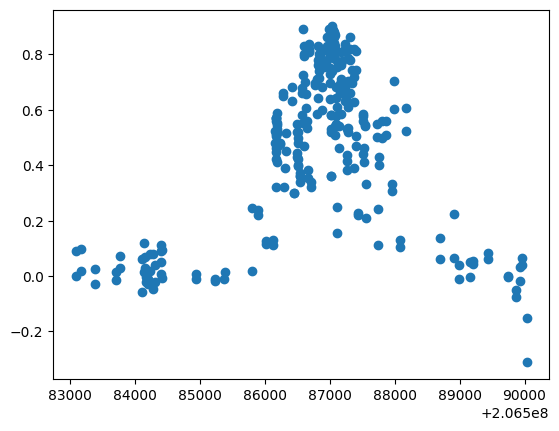

In [225]:
import matplotlib.pyplot as plt
plt.scatter(dmr_df['start'], dmr_df['effect_size'])

<BarContainer object of 286 artists>

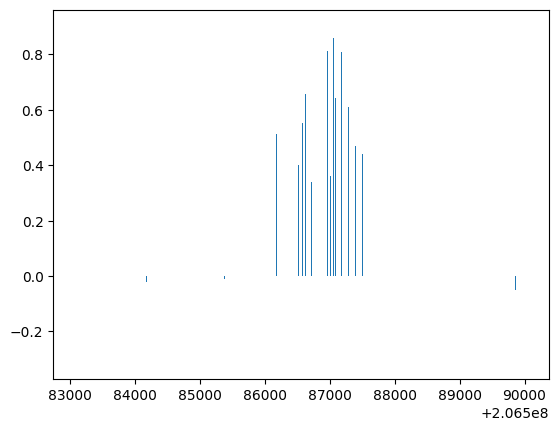

In [226]:
plt.bar(dmr_df['start'], dmr_df['effect_size'])

<BarContainer object of 286 artists>

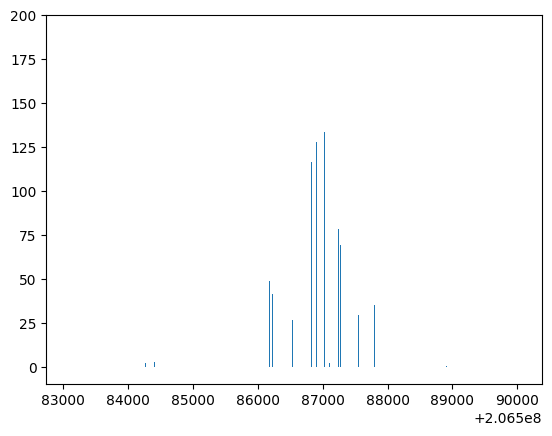

In [227]:
plt.bar(dmr_df['start'], dmr_df['score'])

# Add Hg38 coords by shifting:
-734704

In [228]:
dmr_df['start_hg38']= dmr_df['start'] + 734704
dmr_df['end_hg38']= dmr_df['end'] + 734704
dmr_df['start_t2tv2']= dmr_df['start'] #+ 734704
dmr_df['end_t2tv2']= dmr_df['end'] #+ 734704

In [229]:
dmr_df.columns

Index(['chrom', 'start', 'end', 'name', 'score', 'strand', 'samplea_counts',
       'samplea_total', 'sampleb_counts', 'sampleb_total', 'samplea_percents',
       'sampleb_percents', 'samplea_fraction_modified',
       'sampleb_fraction_modified', 'map_pvalue', 'effect_size', 'cohen_h',
       'cohen_h_low', 'cohen_h_high', 'map_pval_less005', 'map_pval_log10',
       'cg_unit_pair', 'cg_unit_pair_id', 'efsize-score', 'score-efsize',
       'score_scaled', 'efsize-score_scaled', 'start_hg38', 'end_hg38',
       'start_t2tv2', 'end_t2tv2'],
      dtype='object')

In [230]:
dmr_df['cg_unit_pair_id']

0       CG_-1.+
1       CG_-1.-
2        CG_0.+
3        CG_0.-
4        CG_1.+
         ...   
281    CG_139.-
282    CG_140.+
283    CG_140.-
284    CG_141.+
285    CG_141.-
Name: cg_unit_pair_id, Length: 286, dtype: object

# lable x-ticks

In [231]:
# create CG unit pair ids (and keep the user-typed alias with the typo)
# uses existing notebook variables: dmr_df, np, px, os, out_dir, experiment_codition, pvalue_thresh

# build labels based on sorted genomic position and strand, pairing consecutive entries
# order = dmr_df.sort_values(['start', 'strand']).index.to_numpy()
# cg_nums = (np.arange(len(order)) // 2) + 1

# labels = [None] * len(dmr_df)
# for i, orig_idx in enumerate(order):
#     strand = dmr_df.at[orig_idx, 'strand']
#     labels[orig_idx] = f"CG_{cg_nums[i]}.{strand}"

# dmr_df['cg_unit_pair_id'] = labels
# # add alias matching the user's requested (typo) name
# dmr_df['cg_unit_pait_id'] = dmr_df['cg_unit_pair_id']

# Bar: use cg_unit_pair_id on x-axis
fig_bar_unsorted = px.bar(
    dmr_df,
    x='cg_unit_pair_id',
    y='score',
    color='map_pval_less005',
    title=f"log marginal Likelihood(LML) score & p-vals<0.005 for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'score': 'LML', 'cg_unit_pair_id': 'CG unit id', 'map_pval_less005': f'Significant (p <= {pvalue_thresh})'}
)

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520, margin=dict(b=200))
os.makedirs(out_dir, exist_ok=True)
outpath = os.path.join(out_dir, f"dmr_score_by_cg_unit.html")
try:
    fig_bar_unsorted.write_html(outpath, include_plotlyjs='cdn')
    print("Saved plot to:", outpath)
except Exception:
    print("Could not save HTML, displaying inline instead.")
fig_bar_unsorted.show()

Saved plot to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/dmr_score_by_cg_unit.html


In [232]:

# Bar: use cg_unit_pair_id on x-axis
fig_bar_unsorted = px.bar(
    dmr_df,
    x='cg_unit_pair_id',
    y='effect_size',
    color='map_pval_less005',
    title=f"Effect size with p-vals<0.005 for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'score': 'Effect size', 'cg_unit_pair_id': 'CG unit id', 'map_pval_less005': f'Significant (p <= {pvalue_thresh})'}
)

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520, margin=dict(b=200))
os.makedirs(out_dir, exist_ok=True)
outpath = os.path.join(out_dir, f"dmr_effect_size_by_cg_unit.html")
try:
    fig_bar_unsorted.write_html(outpath, include_plotlyjs='cdn')
    print("Saved plot to:", outpath)
except Exception:
    print("Could not save HTML, displaying inline instead.")
fig_bar_unsorted.show()

Saved plot to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/dmr_effect_size_by_cg_unit.html


In [233]:
# Preserve original dataframe row order and plot cg_unit_pair_id in that exact order
# Uses existing notebook variables: dmr_df, out_dir, experiment_codition, pvalue_thresh, os, px

# create a copy that preserves current row order and ensures cg_unit_pair_id is categorical in that order
df_plot = dmr_df.copy().reset_index(drop=True)
ordered_cats = df_plot['cg_unit_pair_id'].astype(str).tolist()
df_plot['cg_unit_pair_id'] = pd.Categorical(df_plot['cg_unit_pair_id'], categories=ordered_cats, ordered=True)

fig_b = px.bar(
    df_plot,
    x='cg_unit_pair_id',
    y='effect_size',
    color='map_pval_less005',
    category_orders={'cg_unit_pair_id': ordered_cats},
    title=f"Effect size with p-vals<0.005 for all CGs (n={len(df_plot)}) <br>{experiment_codition}",
    labels={'score': 'Effect size', 'cg_unit_pair_id': 'CG unit id', 'map_pval_less005': f'Significant (p <= {pvalue_thresh})'}
)

fig_b.update_layout(xaxis_tickangle=45, height=520, margin=dict(b=200))
os.makedirs(out_dir, exist_ok=True)
outpath = os.path.join(out_dir, f"dmr_effect_size_by_cgID_{experiment_codition}.html")
try:
    fig_b.write_html(outpath, include_plotlyjs='cdn')
    print("Saved plot to:", outpath)
except Exception:
    print("Could not save HTML, displaying inline instead.")
fig_b.show()

Saved plot to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/dmr_effect_size_by_cgID_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.html


In [234]:
# Preserve original dataframe row order and plot cg_unit_pair_id in that exact order
# Uses existing notebook variables: dmr_df, out_dir, experiment_codition, pvalue_thresh, os, px

# create a copy that preserves current row order and ensures cg_unit_pair_id is categorical in that order
# df_plot = dmr_df.copy().reset_index(drop=True)
# ordered_cats = df_plot['cg_unit_pair_id'].astype(str).tolist()
# df_plot['cg_unit_pair_id'] = pd.Categorical(df_plot['cg_unit_pair_id'], categories=ordered_cats, ordered=True)

fig_b = px.bar(
    dmr_df,
    x='start',
    y='effect_size',
    color='map_pval_less005',
    category_orders={'cg_unit_pair_id': ordered_cats},
    title=f"Effect size with p-vals<0.005 for all CGs (n={len(df_plot)}) <br>{experiment_codition}",
    labels={'score': 'Effect size', 'cg_unit_pair_id': 'CG unit id', 'map_pval_less005': f'Significant (p <= {pvalue_thresh})'}
)

fig_b.update_layout(xaxis_tickangle=45, height=520, margin=dict(b=200))


# 🚀 Make bars visible
fig_b.update_traces(width=8, marker_line_width=0)

# Optional: larger plot
fig_b.update_layout(xaxis_tickangle=45, height=700, width=1600, margin=dict(b=200))


os.makedirs(out_dir, exist_ok=True)
outpath = os.path.join(out_dir, f"dmr_effect_size_genome_whide_{experiment_codition}.html")
try:
    fig_b.write_html(outpath, include_plotlyjs='cdn')
    print("Saved plot to:", outpath)
except Exception:
    print("Could not save HTML, displaying inline instead.")
fig_b.show()

Saved plot to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/dmr_effect_size_genome_whide_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.html


In [235]:
# Preserve original dataframe row order and plot cg_unit_pair_id in that exact order
# Uses existing notebook variables: dmr_df, out_dir, experiment_codition, pvalue_thresh, os, px

# create a copy that preserves current row order and ensures cg_unit_pair_id is categorical in that order
# df_plot = dmr_df.copy().reset_index(drop=True)
# ordered_cats = df_plot['cg_unit_pair_id'].astype(str).tolist()
# df_plot['cg_unit_pair_id'] = pd.Categorical(df_plot['cg_unit_pair_id'], categories=ordered_cats, ordered=True)

fig_b = px.bar(
    dmr_df,
    x='start',
    y='effect_size',
    opacity=0.6,
    color='map_pval_less005',
    category_orders={'cg_unit_pair_id': ordered_cats},
    title=f"Effect size with p-vals<0.005 for all CGs (n={len(df_plot)}) <br>{experiment_codition}",
    labels={'score': 'Effect size', 'cg_unit_pair_id': 'CG unit id', 'map_pval_less005': f'Significant (p <= {pvalue_thresh})'}
)

fig_b.update_layout(xaxis_tickangle=45, height=520, margin=dict(b=200))


# 🚀 Make bars visible
fig_b.update_traces(width=8, marker_line_width=0)

# Optional: larger plot
# fig_b.update_layout(xaxis_tickangle=45, height=700, width=1600, margin=dict(b=200))


os.makedirs(out_dir, exist_ok=True)
outpath = os.path.join(out_dir, f"dmr_effect_size_genome_whide_{experiment_codition}.html")
try:
    fig_b.write_html(outpath, include_plotlyjs='cdn')
    print("Saved plot to:", outpath)
except Exception:
    print("Could not save HTML, displaying inline instead.")
fig_b.show()

Saved plot to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/dmr_effect_size_genome_whide_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.html


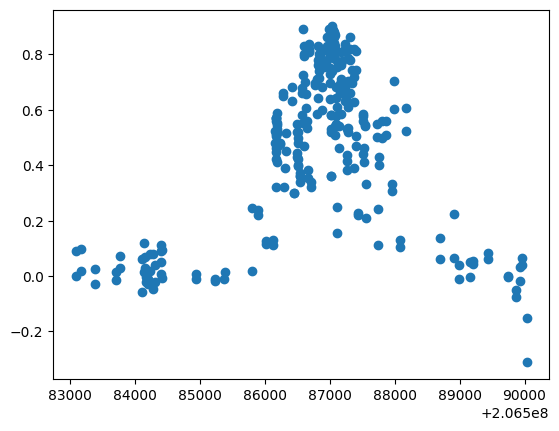

In [236]:
plt.scatter(dmr_df['start'], dmr_df['effect_size'])

In [237]:

# # Bar: effect size per position (without sorting) with effect size colors 
# # dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
# fig_bar_unsorted = px.bar(
#     dmr_df,
#     x='cg_unit_pair_id',
#     y='efsize-score_scaled',        
#     color='map_pval_less005',
#     title=f"sefsize-score_scaled (n={len(dmr_df)}) <br>{experiment_codition}",
#     labels={'efsize-score_scaled':'Effect size (A - B)','label':'position:strand'}
# )
#         # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
#         # x='label',

# fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
# bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# # fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
# fig_bar_unsorted.show()
# # print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
    

In [174]:
    # x=dmr_df.index, 
# 
# Bar: effect size per position (without sorting) with effect size colors 
# dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
fig_bar_unsorted = px.bar(
    dmr_df,
    x='cg_unit_pair_id',
    y='efsize-score_scaled',        
    color='map_pval_less005',
    title=f"sefsize-score_scaled (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'efsize-score_scaled':'Effect size (A - B)','label':'position:strand'}
)
        # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        # x='label',

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
fig_bar_unsorted.show()
# print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
    

In [238]:


# Bar: use cg_unit_pair_id on x-axis
fig_bar_unsorted = px.bar(
    dmr_df,
    x='start_hg38',
    y='score',
    color='map_pval_less005',
    title=f"log marginal Likelihood(LML) score & p-vals<0.005 for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'score': 'LML', 'cg_unit_pair_id': 'CG unit id', 'map_pval_less005': f'Significant (p <= {pvalue_thresh})'}
)

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520, margin=dict(b=200))

fig_bar_unsorted.show()

In [239]:

# Bar: effect size per position (without sorting) with effect size colors 
# dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
fig_bar_unsorted = px.bar(
    dmr_df,
    x=dmr_df.index, 
    y='effect_size',        
    color='map_pval_less005',
    title=f"Effect size & p-vals<0.005 for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'effect_size':'Effect size (A - B)','label':'position:strand'}
)
        # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        # x='label',

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
fig_bar_unsorted.show()
# print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
    
    
# Bar: effect size per position (without sorting) with effect size colors 
# dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
fig_bar_unsorted = px.bar(
    dmr_df,
    x=dmr_df.index, 
    y='score',        
    color='map_pval_less005',
    title=f"log marginal Likelihood(LML) score & p-vals<0.005 for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'score':'LML','label':'position:strand'}
)
        # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        # x='label',

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
fig_bar_unsorted.show()
# print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
    

In [240]:
# Preserve original dataframe row order and plot cg_unit_pair_id in that exact order
# Uses existing notebook variables: dmr_df, out_dir, experiment_codition, pvalue_thresh, os, px

# create a copy that preserves current row order and ensures cg_unit_pair_id is categorical in that order
# df_plot = dmr_df.copy().reset_index(drop=True)
# ordered_cats = df_plot['cg_unit_pair_id'].astype(str).tolist()
# df_plot['cg_unit_pair_id'] = pd.Categorical(df_plot['cg_unit_pair_id'], categories=ordered_cats, ordered=True)

fig_b = px.bar(
    dmr_df,
    x='start',
    y='effect_size',
    opacity=0.3,
    color='map_pval_less005',
    category_orders={'cg_unit_pair_id': ordered_cats},
    title=f"Effect size with p-vals<0.005 for all CGs (n={len(df_plot)}) <br>{experiment_codition}",
    labels={'score': 'Effect size', 'cg_unit_pair_id': 'CG unit id', 'map_pval_less005': f'Significant (p <= {pvalue_thresh})'}
)

fig_b.update_layout(xaxis_tickangle=45, height=520, margin=dict(b=200))


# 🚀 Make bars visible
fig_b.update_traces(width=8, marker_line_width=0)

# Optional: larger plot
# fig_b.update_layout(xaxis_tickangle=45, height=700, width=1600, margin=dict(b=200))


os.makedirs(out_dir, exist_ok=True)
outpath = os.path.join(out_dir, f"dmr_effect_size_genome_whide_{experiment_codition}_opac03.html")
try:
    fig_b.write_html(outpath, include_plotlyjs='cdn')
    print("Saved plot to:", outpath)
except Exception:
    print("Could not save HTML, displaying inline instead.")
fig_b.show()

Saved plot to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/dmr_effect_size_genome_whide_K562_ZFPoffHigh_vs_Unedit_filtered_mC07_opac03.html


# Normalize score to be between 0 and 1

In [243]:
dmr_df["score_norm"]= (dmr_df["score"] - dmr_df["score"].min()) / (dmr_df["score"].max() - dmr_df["score"].min())
dmr_df["score_norm"]

0      0.000044
1      0.001057
2      0.013655
3      0.000819
4      0.002682
         ...   
281    0.000174
282    0.000673
283    0.000647
284    0.017970
285    0.000962
Name: score_norm, Length: 286, dtype: float64

In [244]:
# Bar: effect size per position (without sorting) with effect size colors 
# dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
fig_bar_unsorted = px.bar(
    dmr_df,
    x=dmr_df.index, 
    y='score_norm',        
    color='map_pval_less005',
    title=f"log marginal Likelihood(LML) score & p-vals<0.005 for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'score':'LML','label':'position:strand'}
)
        # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        # x='label',

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
fig_bar_unsorted.show()

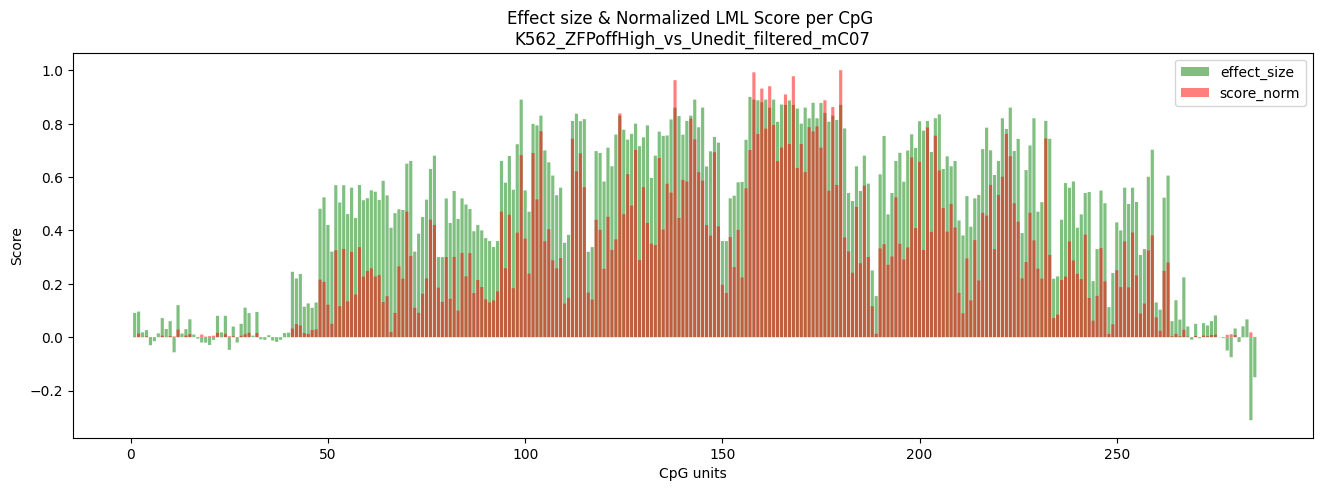

In [245]:
plt.figure(figsize=(16, 5))

plt.bar(np.arange(len(dmr_df['effect_size'])), dmr_df['effect_size'], 
        snap=False, alpha=0.5, label='effect_size', color='green') #, color=dmr_df['map_pval_less005'])

plt.bar(np.arange(len(dmr_df['score_norm'])), dmr_df['score_norm'], 
        snap=False, alpha=0.5, label='score_norm', color='red') #, color=dmr_df['map_pval_less005'])

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Score') 
plt.title('Effect size & Normalized LML Score per CpG \n' + experiment_codition)
plt.legend()
plt.show()

In [246]:
# Bar: effect size per position (without sorting) with effect size colors 
# dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
fig_bar_unsorted = px.bar(
    dmr_df,
    x=dmr_df.index, 
    y='score_norm',        
    color='map_pval_less005',
    title=f"log marginal Likelihood(LML) score & p-vals<0.005 for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'score':'LML','label':'position:strand'}
)
        # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        # x='label',

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
fig_bar_unsorted.show()

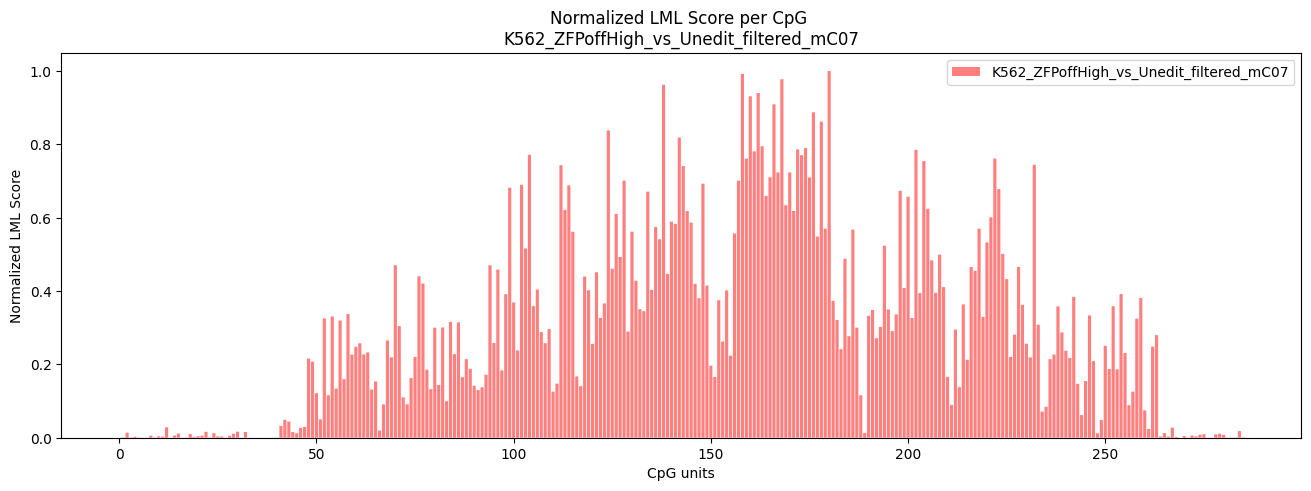

In [247]:
# dmr_df = df_dmr_K562_ZFPoffHigh_vs_Unedit_filtered_mC07 
# experiment_codition="K562_ZFPoffHigh_vs_Unedit_filtered_mC07"
# out_dir=dmr_dir_path
# pvalue_thresh=0.005

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dmr_df['score_norm'])), dmr_df['score_norm'], 
        snap=False, alpha=0.5, label=experiment_codition, color='red')
        # color by map_pval_less005

# plt.bar(np.arange(len(CGs_D6_CRoff_mc07_fracs)), CGs_D6_CRoff_mc07_fracs, snap=False, alpha=0.5, label='D6 mC > 0.7 CRISPRoff', color='deepskyblue')
# plt.bar(np.arange(len(CGs_D6_unedited_mc07_fracs)), CGs_D6_unedited_mc07_fracs, snap=False, alpha=0.5, label='D6 mC > 0.7 Unedited', color='navy')

# plt.bar(np.arange(len(CGs_D35_unedited_mc07_fracs)), CGs_D35_unedited_mc07_fracs, snap=False, alpha=0.5, label='D35 mC > 0.7 Unedited', color='red')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Normalized LML Score') 
plt.title('Normalized LML Score per CpG \n' + experiment_codition)
plt.legend()
# Show the plot
plt.show()

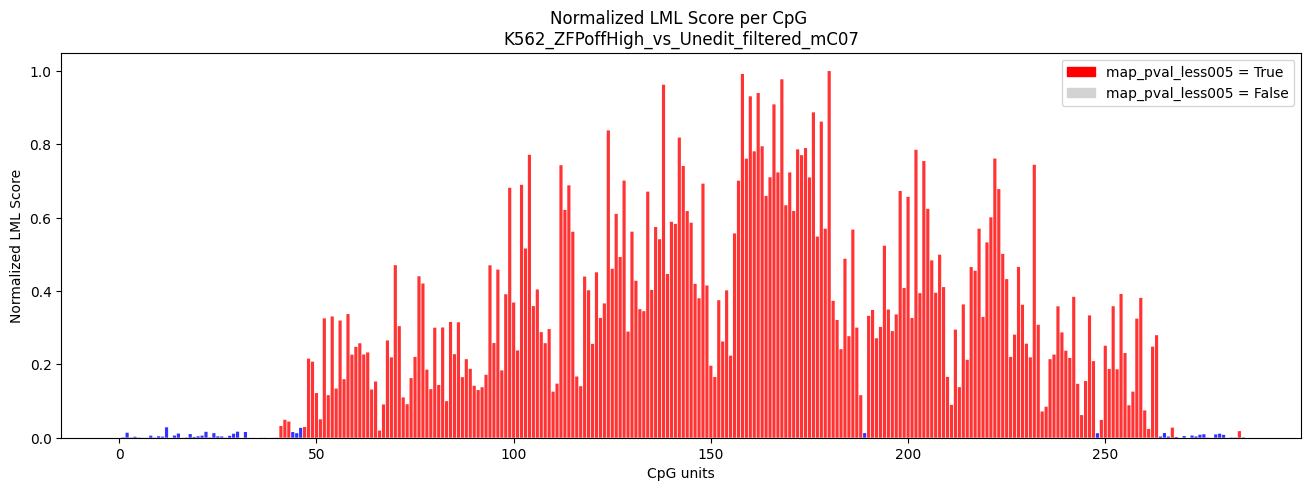

In [248]:
from matplotlib.patches import Patch

# color bars by boolean column 'map_pval_less005'
colors = dmr_df['map_pval_less005'].map({True: 'red', False: 'blue'}).tolist()

plt.figure(figsize=(16, 5))
x = np.arange(len(dmr_df))
y = dmr_df['score_norm']
plt.bar(x, y, color=colors, alpha=0.8, snap=False)
plt.xlabel('CpG units')
plt.ylabel('Normalized LML Score')
plt.title('Normalized LML Score per CpG \n' + experiment_codition)

plt.legend(handles=[Patch(color='red', label='map_pval_less005 = True'),
                    Patch(color='lightgray', label='map_pval_less005 = False')])
plt.show()

In [249]:
dmr_df.columns

Index(['chrom', 'start', 'end', 'name', 'score', 'strand', 'samplea_counts',
       'samplea_total', 'sampleb_counts', 'sampleb_total', 'samplea_percents',
       'sampleb_percents', 'samplea_fraction_modified',
       'sampleb_fraction_modified', 'map_pvalue', 'effect_size', 'cohen_h',
       'cohen_h_low', 'cohen_h_high', 'map_pval_less005', 'map_pval_log10',
       'cg_unit_pair', 'cg_unit_pair_id', 'efsize-score', 'score-efsize',
       'score_scaled', 'efsize-score_scaled', 'start_hg38', 'end_hg38',
       'start_t2tv2', 'end_t2tv2', 'score_norm'],
      dtype='object')

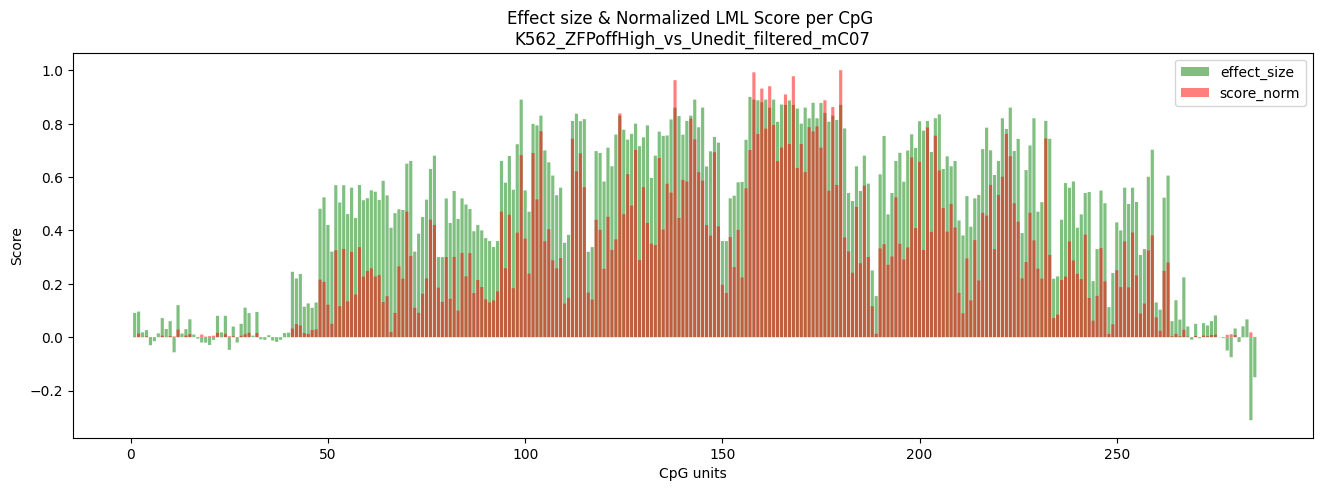

In [250]:
plt.figure(figsize=(16, 5))

plt.bar(np.arange(len(dmr_df['effect_size'])), dmr_df['effect_size'], 
        snap=False, alpha=0.5, label='effect_size', color='green') #, color=dmr_df['map_pval_less005'])

plt.bar(np.arange(len(dmr_df['score_norm'])), dmr_df['score_norm'], 
        snap=False, alpha=0.5, label='score_norm', color='red') #, color=dmr_df['map_pval_less005'])

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Score') 
plt.title('Effect size & Normalized LML Score per CpG \n' + experiment_codition)
plt.legend()
plt.show()

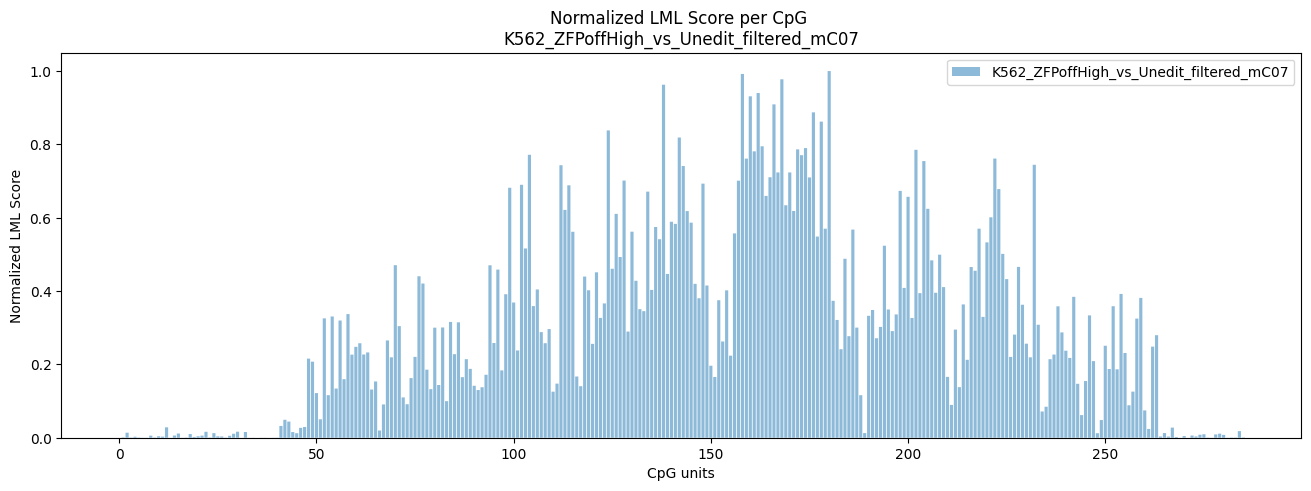

In [ ]:
# dmr_df = df_dmr_K562_ZFPoffHigh_vs_Unedit_filtered_mC07 
# experiment_codition="K562_ZFPoffHigh_vs_Unedit_filtered_mC07"
# out_dir=dmr_dir_path
# pvalue_thresh=0.005

plt.figure(figsize=(16, 5))

plt.bar(np.arange(len(dmr_df['score_norm'])), dmr_df['score_norm'], 
        snap=False, alpha=0.5, label=experiment_codition) # , color=dmr_df['map_pval_less005'])
        # color by map_pval_less005

# plt.bar(np.arange(len(CGs_D6_CRoff_mc07_fracs)), CGs_D6_CRoff_mc07_fracs, snap=False, alpha=0.5, label='D6 mC > 0.7 CRISPRoff', color='deepskyblue')
# plt.bar(np.arange(len(CGs_D6_unedited_mc07_fracs)), CGs_D6_unedited_mc07_fracs, snap=False, alpha=0.5, label='D6 mC > 0.7 Unedited', color='navy')

# plt.bar(np.arange(len(CGs_D35_unedited_mc07_fracs)), CGs_D35_unedited_mc07_fracs, snap=False, alpha=0.5, label='D35 mC > 0.7 Unedited', color='red')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Normalized LML Score') 
plt.title('Normalized LML Score per CpG \n' + experiment_codition)
plt.legend()
# Show the plot
plt.show()

# Save dmr table

In [251]:
date_today = '20251124'

In [253]:
out_dir


'/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/'

In [252]:
dmr_df.columns

Index(['chrom', 'start', 'end', 'name', 'score', 'strand', 'samplea_counts',
       'samplea_total', 'sampleb_counts', 'sampleb_total', 'samplea_percents',
       'sampleb_percents', 'samplea_fraction_modified',
       'sampleb_fraction_modified', 'map_pvalue', 'effect_size', 'cohen_h',
       'cohen_h_low', 'cohen_h_high', 'map_pval_less005', 'map_pval_log10',
       'cg_unit_pair', 'cg_unit_pair_id', 'efsize-score', 'score-efsize',
       'score_scaled', 'efsize-score_scaled', 'start_hg38', 'end_hg38',
       'start_t2tv2', 'end_t2tv2', 'score_norm'],
      dtype='object')

In [254]:
dmr_df.to_csv(os.path.join(out_dir, f'{date_today}_dmr_{experiment_codition}.csv')) # index=False)

In [255]:
os.path.join(out_dir, f'{date_today}_dmr_{experiment_codition}.csv')

'/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/20251124_dmr_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.csv'

In [256]:
date_today

'20251124'

In [257]:
experiment_codition

'K562_ZFPoffHigh_vs_Unedit_filtered_mC07'